In [ ]:
pip install beir

     |████████████████████████████████| 64 kB 1.7 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 8.6 MB 30.6 MB/s 
     |████████████████████████████████| 219 kB 48.1 MB/s 
     |████████████████████████████████| 4.0 MB 34.3 MB/s 
     |████████████████████████████████| 1.2 MB 33.3 MB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 37.9 MB/s 
     |████████████████████████████████| 880 kB 37.4 MB/s 
     |████████████████████████████████| 596 kB 36.0 MB/s 
  Created wheel for beir: filename=beir-1.0.0-py3-none-any.whl size=59109 sha256=7edad7711ecfa4f594c50a395b3b7c0a145cf27eafd2a186888fb352e3bdd6e5
  Stored in directory: /root/.cache/pip/wheels/44/7a/06/f8b09e6ebca22aedf0130d8e151df0e96d1e59c37507fbca5f
  Created wheel for pytrec-eval: filename=pytrec_eval-0.5-cp37-cp37m-linux_x86_64.whl size=264181 sha256=ce2e50d010b01599a5f149caf2128f2a16cb6149e33f629b133fa29c649c7eb5
  S

In [ ]:
pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 4.0 MB/s 
     |████████████████████████████████| 462 kB 49.2 MB/s 


In [ ]:
pip install -U sentence-transformers

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import losses, models
from torch import Tensor
from beir.retrieval.train import TrainRetriever
import torch
from numpy import ndarray
from typing import List, Dict, Union, Tuple
import numpy as np

In [ ]:
from beir import util, LoggingHandler
from beir.datasets.data_loader import GenericDataLoader
from beir.retrieval.evaluation import EvaluateRetrieval
from beir.retrieval.search.sparse import SparseSearch
# from beir.retrieval import models
from beir.retrieval.search.dense import DenseRetrievalExactSearch as DRES
from transformers import AutoTokenizer, AutoModel
from scipy.sparse import csr_matrix
import logging
import pathlib, os
import random

from tqdm.autonotebook import trange
from transformers import AutoModelForMaskedLM, AutoTokenizer
from sentence_transformers.util import batch_to_device

logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])
logger = logging.getLogger(__name__)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

## DATASETS

#### cqadupstack

In [ ]:
dataset = "cqadupstack"
url = "https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{}.zip".format(dataset)
data_path = util.download_and_unzip(url, "datasets")

datasets/cqadupstack.zip:   0%|          | 0.00/4.98G [00:00<?, ?iB/s]

In [ ]:
folders = ["android", "stats", "webmasters", "wordpress"]

In [ ]:
data_path = "/content/datasets/cqadupstack"

In [ ]:
cqa = {"corpus": [], "queries":[], "qrels":[]}
for f in folders:
  corpus, queries, qrels = GenericDataLoader(data_folder=data_path + "/" + f).load(split="test")
  # cqa[f] = {"corpus": corpus, "queries":queries, "qrels":qrels}
  cqa["corpus"].append([corpus])
  cqa["queries"].append([queries])
  cqa["qrels"].append([qrels])

  0%|          | 0/22998 [00:00<?, ?it/s]

  0%|          | 0/40221 [00:00<?, ?it/s]

  0%|          | 0/45301 [00:00<?, ?it/s]

  0%|          | 0/37637 [00:00<?, ?it/s]

  0%|          | 0/16705 [00:00<?, ?it/s]

  0%|          | 0/38316 [00:00<?, ?it/s]

  0%|          | 0/32176 [00:00<?, ?it/s]

  0%|          | 0/42269 [00:00<?, ?it/s]

  0%|          | 0/68184 [00:00<?, ?it/s]

  0%|          | 0/47382 [00:00<?, ?it/s]

  0%|          | 0/17405 [00:00<?, ?it/s]

  0%|          | 0/48605 [00:00<?, ?it/s]

#### mrtydi (russian)

In [ ]:
# dataset = "mrtydi"
# url = "https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{}.zip".format(dataset)
# data_path = util.download_and_unzip(url, "datasets")
# corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")
# url = "https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{}.zip".format(dataset)
# data_path = util.download_and_unzip(url, "datasets")
# print(data_path)
# corpus, queries, qrels = GenericDataLoader(data_folder=data_path+"/russian").load(split="test")

0it [00:00, ?it/s]

IndexError: ignored

In [ ]:
with zipfile.ZipFile("/content/gdrive/MyDrive/russian.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets/mrtydi")

In [ ]:
data_path = "/content/datasets/russian"

In [ ]:
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")

0it [00:00, ?it/s]

IndexError: ignored

### other datasets

In [ ]:
!git clone https://github.com/s-vokhmyanina/datasets_for_dip

Cloning into 'datasets_for_dip'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 59 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.


#### CovidQA

In [ ]:
with zipfile.ZipFile('/content/datasets_for_dip/CovidQA.zip', 'r') as zip_ref:
  zip_ref.extractall('datasets')
data_path = "/content/datasets/CovidQA"
corpus_covid, queries_covid, qrels_covid = GenericDataLoader(data_folder=data_path).load(split="test")

2022-05-03 07:55:35 - Loading Corpus...


  0%|          | 0/147 [00:00<?, ?it/s]

2022-05-03 07:55:35 - Loaded 147 TEST Documents.
2022-05-03 07:55:35 - Doc Example: {'text': "Functional Genetic Variants in DC-SIGNR Are Associated with Mother-to-Child Transmission of HIV-1\n\nhttps://www.ncbi.nlm.nih.gov/pmc/articles/PMC2752805/\n\nBoily-Larouche, Geneviève; Iscache, Anne-Laure; Zijenah, Lynn S.; Humphrey, Jean H.; Mouland, Andrew J.; Ward, Brian J.; Roger, Michel\n2009-10-07\nDOI:10.1371/journal.pone.0007211\nLicense:cc-by\n\nAbstract: BACKGROUND: Mother-to-child transmission (MTCT) is the main cause of HIV-1 infection in children worldwide. Given that the C-type lectin receptor, dendritic cell-specific ICAM-grabbing non-integrin-related (DC-SIGNR, also known as CD209L or liver/lymph node–specific ICAM-grabbing non-integrin (L-SIGN)), can interact with pathogens including HIV-1 and is expressed at the maternal-fetal interface, we hypothesized that it could influence MTCT of HIV-1. METHODS AND FINDINGS: To investigate the potential role of DC-SIGNR in MTCT of HIV-1,

#### SQUAD

In [ ]:
with zipfile.ZipFile('/content/datasets_for_dip/SQUAD.zip', 'r') as zip_ref:
  zip_ref.extractall('datasets')
data_path = "/content/datasets/SQUAD"
corpus_squad, queries_squad, qrels_squad = GenericDataLoader(data_folder=data_path).load(split="test")

2022-05-03 08:57:46 - Loading Corpus...


  0%|          | 0/18891 [00:00<?, ?it/s]

2022-05-03 08:57:47 - Loaded 18891 TEST Documents.
2022-05-03 08:57:47 - Doc Example: {'text': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.', 'title': 'University_of_Notre_Dame'}
2022-05-03 08:57:47 - Loading Queries...
2022-05-03 08:57:47 - Loaded 87599 TEST Queries.
2022-05-03 08:57:47 - Query Example: To whom did the Virgin Mary allegedly app

#### RuBQ (russian)

In [ ]:
with zipfile.ZipFile('/content/datasets_for_dip/RuBQ.zip', 'r') as zip_ref:
  zip_ref.extractall('datasets')
data_path = "/content/datasets/RuBQ"
corpus_ru, queries_ru, qrels_ru = GenericDataLoader(data_folder=data_path).load(split="test")

2022-05-02 12:15:58 - Loading Corpus...


  0%|          | 0/56952 [00:00<?, ?it/s]

2022-05-02 12:15:59 - Loaded 56952 TEST Documents.
2022-05-02 12:15:59 - Doc Example: {'text': 'ЦСКА — советский и российский профессиональный хоккейный клуб из Москвы, выступающий в Континентальной хоккейной лиге. Основан в 1946 году под названием ЦДКА (Центральный дом Красной Армии). В 1951 году переименован в ЦДСА (Центральный дом Советской Армии), а в 1954 в ЦСК МО (Центральный спортивный клуб Министерства обороны), под которым выступал до 1959 года, и с тех пор носит название ЦСКА (Центральный Спортивный Клуб Армии).', 'title': ''}
2022-05-02 12:15:59 - Loading Queries...
2022-05-02 12:15:59 - Loaded 1694 TEST Queries.
2022-05-02 12:15:59 - Query Example: Что может вызвать цунами?


## Func

### slice dict

In [ ]:
def slice(queries):
  items = list(queries.items())
  ll = int(len(items)/2)
  for i in range(len(items)//ll):
    _tmp = items[ll*i:ll*(i+1)]
  return dict(_tmp)

In [ ]:
def slice_spec(queries, prop, start):
  items = list(queries.items())
  ll = int(len(items)/prop)
  for i in range(start, len(items)//ll):
    _tmp = items[ll*i:ll*(i+1)]
  return dict(_tmp)

### draw

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def draw(res_tsdae =None, res_sparta =None, res_ance =None, res_splade=None, metric = None, k_values = None):
  plt.figure(figsize=(15,8))
  data = {}
  for k in k_values:
    key = metric+'@'+str(k)
    data[k] = [res_tsdae[key], res_sparta[key], res_ance[key], res_splade[key]]

  p = sns.lineplot(markers=True, data=pd.DataFrame.from_dict(data, orient='index', columns=['TSDAE', 'SPARTA','ANCE', 'SPLADE']))
  
  p.set_xlabel("K", fontsize = 14)
  p.set_ylabel(metric+"@K", fontsize = 14)
  # plt.rc('grid', linestyle="-", color='black')
  # plt.scatter(x, y)
  plt.grid(True)
  plt.show()


### display table

In [ ]:
def res_table_all(res_tsdae =None, res_sparta =None, res_ance =None, res_splade=None, metrics = None, k_values = None):
  data = {'metrics':[],'TSDAE':[], 'SPARTA':[],'ANCE':[], 'SPLADE':[] }
  for ind, metric in enumerate(metrics):
    for k in k_values:
      key = metric+'@'+str(k)
      data['metrics'].append(key)
      data['TSDAE'].append(res_tsdae[ind][key])
      data['SPARTA'].append(res_sparta[ind][key])
      data['ANCE'].append(res_ance[ind][key])
      data['SPLADE'].append(res_splade[ind][key])

  df = pd.DataFrame.from_dict(data).set_index('metrics')
  return df

In [ ]:
def res_table_metric(res_tsdae =None, res_sparta =None, res_ance =None, res_splade=None, metric = None, k_values = None):
  data = {metric:[],'TSDAE':[], 'SPARTA':[],'ANCE':[], 'SPLADE':[] }
  for k in k_values:
    key = metric+'@'+str(k)
    data[metric].append(key)
    data['TSDAE'].append(res_tsdae[key])
    data['SPARTA'].append(res_sparta[key])
    data['ANCE'].append(res_ance[key])
    data['SPLADE'].append(res_splade[key])

  df = pd.DataFrame.from_dict(data).set_index(metric)
  return df

### Train Model

In [ ]:
def train_model(model_name, dataset_name, corpus, queries, qrels):
  word_embedding_model = models.Transformer(model_name, max_seq_length=350)
  pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
  model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

  retriever = TrainRetriever(model=model, batch_size=8)

  train_samples = retriever.load_train(corpus, queries, qrels)
  train_dataloader = retriever.prepare_train(train_samples, shuffle=True)

  train_loss = losses.MultipleNegativesRankingLoss(model=retriever.model)

  ir_evaluator = retriever.load_ir_evaluator(corpus, queries, qrels)

  model_save_path = os.path.join('/content', "output", "{}-v1-{}".format(model_name, dataset_name))
  os.makedirs(model_save_path, exist_ok=True)

  num_epochs = 1
  evaluation_steps = 5000

  warmup_steps = int(len(train_samples) * num_epochs / retriever.batch_size)

  retriever.fit(train_objectives=[(train_dataloader, train_loss)], 
                  evaluator=ir_evaluator, 
                  epochs=num_epochs,
                  output_path=model_save_path,
                  warmup_steps=warmup_steps,
                  evaluation_steps=evaluation_steps,
                  use_amp=True)

In [ ]:
model_name = ['kwang2049/TSDAE-scidocs', 'BeIR/sparta-msmarco-distilbert-base-v1',
              'sentence-transformers/msmarco-roberta-base-ance-firstp', "vocab-transformers/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated"]

### Model Test

In [ ]:
class MODEL:
  def __init__(self, model_path: Union[str, Tuple] = 'paraphrase-distilroberta-base-v1', sep: str = " ", **kwargs):
    self.sep = sep

    if isinstance(model_path, str):
      self.q_model = SentenceTransformer(model_path)
      self.doc_model = self.q_model

    elif isinstance(model_path, tuple):
      self.q_model = SentenceTransformer(model_path[0])
      self.doc_model = SentenceTransformer(model_path[1])

  def encode_queries(self, queries: List[str], batch_size: int, **kwargs) -> Union[List[Tensor], np.ndarray, Tensor]:
    return self.q_model.encode(queries, batch_size=32, **kwargs)

  def encode_corpus(self, corpus: List[Dict[str, str]], batch_size: int, **kwargs) -> Union[List[Tensor], np.ndarray, Tensor]:
    sentences = [(doc["title"] + self.sep + doc["text"]).strip() if "title" in doc else doc["text"].strip() for doc in corpus]
    return self.doc_model.encode(sentences, batch_size=32, **kwargs)

In [ ]:
def evaluate(model, corpus, queries, qrels, k_values):
  retriever = EvaluateRetrieval(model, score_function="dot", k_values=k_values)
  results = retriever.retrieve(corpus, queries)
  logging.info("Retriever evaluation for k in: {}".format(retriever.k_values))
  ndcg, _map, recall, precision = retriever.evaluate(qrels, results, retriever.k_values)

  top_k = 5

  query_id, ranking_scores = list(results.items())[5]
  scores_sorted = sorted(ranking_scores.items(), key=lambda item: item[1], reverse=True)
  logging.info("Query : %s\n" % queries[query_id])

  for rank in range(top_k):
      doc_id = scores_sorted[rank][0]
      logging.info("Rank %d: %s [%s] - %s\n" % (rank+1, doc_id, corpus[doc_id].get("title"), corpus[doc_id].get("text")[:1000]))
  return [ndcg, _map, recall, precision]

In [ ]:
models_=['TSDAE', 'SPARTA','ANCE', 'SPLADE']
k_values = [1,3,5,10, 50, 100]

In [ ]:
def evaluate_model(model_path, corpus, queries, qrels, batch_size=32):
  # if (id == 1):
  #    m = SparseSearch(SPARTA(model_path), batch_size=batch_size)
  #    return evaluate(m, corpus, queries, qrels, k_values)
  # if (id == 3): 
  #    m = DRES(SPLADE(model_path), batch_size=batch_size)
  #    return evaluate(m, corpus, queries, qrels, k_values)
  
  m = DRES(MODEL(model_path), batch_size=batch_size)
  return evaluate(m, corpus, queries, qrels, k_values)

## CovidQA

### train

In [ ]:
train_model(model_name[0], "covidQA", corpus_covid, slice(queries_covid), qrels_covid)

2022-05-02 12:16:58 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:16:58 - Loaded 1009 training pairs.
2022-05-02 12:16:58 - eval set contains 147 documents and 1009 queries
2022-05-02 12:16:58 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:21:59 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:22:09 - Queries: 1009
2022-05-02 12:22:09 - Corpus: 147

2022-05-02 12:22:09 - Score-Function: cos_sim
2022-05-02 12:22:09 - Accuracy@1: 53.52%
2022-05-02 12:22:09 - Accuracy@3: 69.67%
2022-05-02 12:22:09 - Accuracy@5: 75.92%
2022-05-02 12:22:09 - Accuracy@10: 82.26%
2022-05-02 12:22:09 - Precision@1: 53.52%
2022-05-02 12:22:09 - Precision@3: 23.22%
2022-05-02 12:22:09 - Precision@5: 15.18%
2022-05-02 12:22:09 - Precision@10: 8.23%
2022-05-02 12:22:09 - Recall@1: 53.52%
2022-05-02 12:22:09 - Recall@3: 69.67%
2022-05-02 12:22:09 - Recall@5: 75.92%
2022-05-02 12:22:09 - Recall@10: 82.26%
2022-05-02 12:22:09 - MRR@10: 0.6299
2022-05-02 12:22:09 - NDCG@10: 0.6765
2022-05-02 12:22:09 - MAP@100: 0.6366
2022-05-02 12:22:09 - Score-Function: dot_score
2022-05-02 12:22:09 - Accuracy@1: 56.69%
2022-05-02 12:22:09 - Accuracy@3: 71.66%
2022-05-02 12:22:09 - Accuracy@5: 77.60%
2022-05-02 12:22:09 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:27:12 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 12:27:22 - Queries: 1009
2022-05-02 12:27:22 - Corpus: 147

2022-05-02 12:27:22 - Score-Function: cos_sim
2022-05-02 12:27:22 - Accuracy@1: 72.25%
2022-05-02 12:27:22 - Accuracy@3: 85.83%
2022-05-02 12:27:22 - Accuracy@5: 90.09%
2022-05-02 12:27:22 - Accuracy@10: 94.15%
2022-05-02 12:27:22 - Precision@1: 72.25%
2022-05-02 12:27:22 - Precision@3: 28.61%
2022-05-02 12:27:22 - Precision@5: 18.02%
2022-05-02 12:27:22 - Precision@10: 9.42%
2022-05-02 12:27:22 - Recall@1: 72.25%
2022-05-02 12:27:22 - Recall@3: 85.83%
2022-05-02 12:27:22 - Recall@5: 90.09%
2022-05-02 12:27:22 - Recall@10: 94.15%
2022-05-02 12:27:22 - MRR@10: 0.8000
2022-05-02 12:27:22 - NDCG@10: 0.8345
2022-05-02 12:27:22 - MAP@100: 0.8032
2022-05-02 12:27:22 - Score-Function: dot_score
2022-05-02 12:27:22 - Accuracy@1: 75.62%
2022-05-02 12:27:22 - Accuracy@3: 89.30%
2022-05-02 12:27:22 - Accuracy@5: 93.06%
2022-05-02 12:27:22 - A

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[1], "covidQA", corpus_covid, slice(queries_covid), qrels_covid)

2022-05-02 12:31:15 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:31:15 - Loaded 1009 training pairs.
2022-05-02 12:31:15 - eval set contains 147 documents and 1009 queries
2022-05-02 12:31:15 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:33:58 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:34:04 - Queries: 1009
2022-05-02 12:34:04 - Corpus: 147

2022-05-02 12:34:04 - Score-Function: cos_sim
2022-05-02 12:34:04 - Accuracy@1: 35.88%
2022-05-02 12:34:04 - Accuracy@3: 51.34%
2022-05-02 12:34:04 - Accuracy@5: 56.69%
2022-05-02 12:34:04 - Accuracy@10: 66.20%
2022-05-02 12:34:04 - Precision@1: 35.88%
2022-05-02 12:34:04 - Precision@3: 17.11%
2022-05-02 12:34:04 - Precision@5: 11.34%
2022-05-02 12:34:04 - Precision@10: 6.62%
2022-05-02 12:34:04 - Recall@1: 35.88%
2022-05-02 12:34:04 - Recall@3: 51.34%
2022-05-02 12:34:04 - Recall@5: 56.69%
2022-05-02 12:34:04 - Recall@10: 66.20%
2022-05-02 12:34:04 - MRR@10: 0.4520
2022-05-02 12:34:04 - NDCG@10: 0.5021
2022-05-02 12:34:04 - MAP@100: 0.4640
2022-05-02 12:34:04 - Score-Function: dot_score
2022-05-02 12:34:04 - Accuracy@1: 36.37%
2022-05-02 12:34:04 - Accuracy@3: 51.44%
2022-05-02 12:34:04 - Accuracy@5: 57.28%
2022-05-02 12:34:04 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:36:47 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 12:36:53 - Queries: 1009
2022-05-02 12:36:53 - Corpus: 147

2022-05-02 12:36:53 - Score-Function: cos_sim
2022-05-02 12:36:53 - Accuracy@1: 61.25%
2022-05-02 12:36:53 - Accuracy@3: 80.77%
2022-05-02 12:36:53 - Accuracy@5: 86.12%
2022-05-02 12:36:53 - Accuracy@10: 90.68%
2022-05-02 12:36:53 - Precision@1: 61.25%
2022-05-02 12:36:53 - Precision@3: 26.92%
2022-05-02 12:36:53 - Precision@5: 17.22%
2022-05-02 12:36:53 - Precision@10: 9.07%
2022-05-02 12:36:53 - Recall@1: 61.25%
2022-05-02 12:36:53 - Recall@3: 80.77%
2022-05-02 12:36:53 - Recall@5: 86.12%
2022-05-02 12:36:53 - Recall@10: 90.68%
2022-05-02 12:36:53 - MRR@10: 0.7201
2022-05-02 12:36:53 - NDCG@10: 0.7659
2022-05-02 12:36:53 - MAP@100: 0.7246
2022-05-02 12:36:53 - Score-Function: dot_score
2022-05-02 12:36:53 - Accuracy@1: 68.29%
2022-05-02 12:36:53 - Accuracy@3: 82.46%
2022-05-02 12:36:53 - Accuracy@5: 86.12%
2022-05-02 12:36:53 - A

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[2], "covidQA", corpus_covid, slice(queries_covid), qrels_covid)

Downloading:   0%|          | 0.00/787 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

2022-05-02 12:40:17 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:40:17 - Loaded 1009 training pairs.
2022-05-02 12:40:17 - eval set contains 147 documents and 1009 queries
2022-05-02 12:40:17 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:45:16 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:45:26 - Queries: 1009
2022-05-02 12:45:26 - Corpus: 147

2022-05-02 12:45:26 - Score-Function: cos_sim
2022-05-02 12:45:26 - Accuracy@1: 43.41%
2022-05-02 12:45:26 - Accuracy@3: 59.17%
2022-05-02 12:45:26 - Accuracy@5: 66.70%
2022-05-02 12:45:26 - Accuracy@10: 74.23%
2022-05-02 12:45:26 - Precision@1: 43.41%
2022-05-02 12:45:26 - Precision@3: 19.72%
2022-05-02 12:45:26 - Precision@5: 13.34%
2022-05-02 12:45:26 - Precision@10: 7.42%
2022-05-02 12:45:26 - Recall@1: 43.41%
2022-05-02 12:45:26 - Recall@3: 59.17%
2022-05-02 12:45:26 - Recall@5: 66.70%
2022-05-02 12:45:26 - Recall@10: 74.23%
2022-05-02 12:45:26 - MRR@10: 0.5319
2022-05-02 12:45:26 - NDCG@10: 0.5823
2022-05-02 12:45:26 - MAP@100: 0.5407
2022-05-02 12:45:26 - Score-Function: dot_score
2022-05-02 12:45:26 - Accuracy@1: 46.68%
2022-05-02 12:45:26 - Accuracy@3: 61.35%
2022-05-02 12:45:26 - Accuracy@5: 67.39%
2022-05-02 12:45:26 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:50:25 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 12:50:36 - Queries: 1009
2022-05-02 12:50:36 - Corpus: 147

2022-05-02 12:50:36 - Score-Function: cos_sim
2022-05-02 12:50:36 - Accuracy@1: 63.33%
2022-05-02 12:50:36 - Accuracy@3: 78.69%
2022-05-02 12:50:36 - Accuracy@5: 84.94%
2022-05-02 12:50:36 - Accuracy@10: 89.69%
2022-05-02 12:50:36 - Precision@1: 63.33%
2022-05-02 12:50:36 - Precision@3: 26.23%
2022-05-02 12:50:36 - Precision@5: 16.99%
2022-05-02 12:50:36 - Precision@10: 8.97%
2022-05-02 12:50:36 - Recall@1: 63.33%
2022-05-02 12:50:36 - Recall@3: 78.69%
2022-05-02 12:50:36 - Recall@5: 84.94%
2022-05-02 12:50:36 - Recall@10: 89.69%
2022-05-02 12:50:36 - MRR@10: 0.7212
2022-05-02 12:50:36 - NDCG@10: 0.7639
2022-05-02 12:50:36 - MAP@100: 0.7258
2022-05-02 12:50:36 - Score-Function: dot_score
2022-05-02 12:50:36 - Accuracy@1: 63.63%
2022-05-02 12:50:36 - Accuracy@3: 81.37%
2022-05-02 12:50:36 - Accuracy@5: 87.22%
2022-05-02 12:50:36 - A

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[3], "covidQA", corpus_covid, slice(queries_covid), qrels_covid)

Downloading:   0%|          | 0.00/601 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/917M [00:00<?, ?B/s]

Some weights of the model checkpoint at vocab-transformers/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

2022-05-02 12:55:11 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:55:11 - Loaded 1009 training pairs.
2022-05-02 12:55:11 - eval set contains 147 documents and 1009 queries
2022-05-02 12:55:11 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:58:02 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:58:07 - Queries: 1009
2022-05-02 12:58:07 - Corpus: 147

2022-05-02 12:58:08 - Score-Function: cos_sim
2022-05-02 12:58:08 - Accuracy@1: 40.34%
2022-05-02 12:58:08 - Accuracy@3: 58.47%
2022-05-02 12:58:08 - Accuracy@5: 64.12%
2022-05-02 12:58:08 - Accuracy@10: 73.54%
2022-05-02 12:58:08 - Precision@1: 40.34%
2022-05-02 12:58:08 - Precision@3: 19.49%
2022-05-02 12:58:08 - Precision@5: 12.82%
2022-05-02 12:58:08 - Precision@10: 7.35%
2022-05-02 12:58:08 - Recall@1: 40.34%
2022-05-02 12:58:08 - Recall@3: 58.47%
2022-05-02 12:58:08 - Recall@5: 64.12%
2022-05-02 12:58:08 - Recall@10: 73.54%
2022-05-02 12:58:08 - MRR@10: 0.5109
2022-05-02 12:58:08 - NDCG@10: 0.5648
2022-05-02 12:58:08 - MAP@100: 0.5214
2022-05-02 12:58:08 - Score-Function: dot_score
2022-05-02 12:58:08 - Accuracy@1: 40.44%
2022-05-02 12:58:08 - Accuracy@3: 59.96%
2022-05-02 12:58:08 - Accuracy@5: 67.39%
2022-05-02 12:58:08 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 13:01:02 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 13:01:07 - Queries: 1009
2022-05-02 13:01:07 - Corpus: 147

2022-05-02 13:01:08 - Score-Function: cos_sim
2022-05-02 13:01:08 - Accuracy@1: 55.60%
2022-05-02 13:01:08 - Accuracy@3: 78.89%
2022-05-02 13:01:08 - Accuracy@5: 84.14%
2022-05-02 13:01:08 - Accuracy@10: 91.28%
2022-05-02 13:01:08 - Precision@1: 55.60%
2022-05-02 13:01:08 - Precision@3: 26.30%
2022-05-02 13:01:08 - Precision@5: 16.83%
2022-05-02 13:01:08 - Precision@10: 9.13%
2022-05-02 13:01:08 - Recall@1: 55.60%
2022-05-02 13:01:08 - Recall@3: 78.89%
2022-05-02 13:01:08 - Recall@5: 84.14%
2022-05-02 13:01:08 - Recall@10: 91.28%
2022-05-02 13:01:08 - MRR@10: 0.6841
2022-05-02 13:01:08 - NDCG@10: 0.7398
2022-05-02 13:01:08 - MAP@100: 0.6887
2022-05-02 13:01:08 - Score-Function: dot_score
2022-05-02 13:01:08 - Accuracy@1: 60.06%
2022-05-02 13:01:08 - Accuracy@3: 80.57%
2022-05-02 13:01:08 - Accuracy@5: 85.33%
2022-05-02 13:01:08 - A

In [ ]:
torch.cuda.empty_cache()

### test

In [ ]:
total = {}

In [ ]:
total[models_[0]] = evaluate_model("/content/drive/MyDrive/covid_models/TSDAE-scidocs-v1-covidQA", corpus_covid, queries_covid, qrels_covid)

2022-05-03 08:32:47 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/TSDAE-scidocs-v1-covidQA
2022-05-03 08:32:49 - Use pytorch device: cuda
2022-05-03 08:32:49 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:32:55 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:32:55 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:32:55 - Scoring Function: Dot Product (dot)
2022-05-03 08:32:55 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:03 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - NDCG@1: 0.4611
2022-05-03 08:33:03 - NDCG@3: 0.5511
2022-05-03 08:33:03 - NDCG@5: 0.5724
2022-05-03 08:33:03 - NDCG@10: 0.5963
2022-05-03 08:33:03 - NDCG@50: 0.6336
2022-05-03 08:33:03 - NDCG@100: 0.6445
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - MAP@1: 0.4611
2022-05-03 08:33:03 - MAP@3: 0.5295
2022-05-03 08:33:03 - MAP@5: 0.5414
2022-05-03 08:33:03 - MAP@10: 0.5513
2022-05-03 08:33:03 - MAP@50: 0.5594
2022-05-03 08:33:03 - MAP@100: 0.5604
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - Recall@1: 0.4611
2022-05-03 08:33:03 - Recall@3: 0.6132
2022-05-03 08:33:03 - Recall@5: 0.6647
2022-05-03 08:33:03 - Recall@10: 0.7385
2022-05-03 08:33:03 - Recall@50: 0.9059
2022-05-03 08:33:03 - Recall@100: 0.9732
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - P@1: 0.4611
2022-05-03 08:33:03 - P@3: 0.2044
2022-05-03 08:33:03 - P@5: 0.1329
2022-05-03 08:33:03 - P@10: 0.0738
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[1]] = evaluate_model("/content/drive/MyDrive/covid_models/sparta-msmarco-distilbert-base-v1-v1-covidQA", corpus_covid, queries_covid, qrels_covid)

2022-05-03 08:33:03 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/sparta-msmarco-distilbert-base-v1-v1-covidQA
2022-05-03 08:33:05 - Use pytorch device: cuda
2022-05-03 08:33:05 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:08 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:08 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:08 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:08 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:13 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - NDCG@1: 0.4309
2022-05-03 08:33:13 - NDCG@3: 0.5080
2022-05-03 08:33:13 - NDCG@5: 0.5297
2022-05-03 08:33:13 - NDCG@10: 0.5570
2022-05-03 08:33:13 - NDCG@50: 0.6010
2022-05-03 08:33:13 - NDCG@100: 0.6137
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - MAP@1: 0.4309
2022-05-03 08:33:13 - MAP@3: 0.4894
2022-05-03 08:33:13 - MAP@5: 0.5013
2022-05-03 08:33:13 - MAP@10: 0.5126
2022-05-03 08:33:13 - MAP@50: 0.5221
2022-05-03 08:33:13 - MAP@100: 0.5232
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - Recall@1: 0.4309
2022-05-03 08:33:13 - Recall@3: 0.5617
2022-05-03 08:33:13 - Recall@5: 0.6147
2022-05-03 08:33:13 - Recall@10: 0.6994
2022-05-03 08:33:13 - Recall@50: 0.8970
2022-05-03 08:33:13 - Recall@100: 0.9757
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - P@1: 0.4309
2022-05-03 08:33:13 - P@3: 0.1872
2022-05-03 08:33:13 - P@5: 0.1229
2022-05-03 08:33:13 - P@10: 0.0699
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[2]] = evaluate_model("/content/drive/MyDrive/covid_models/msmarco-roberta-base-ance-firstp-v1-covidQA", corpus_covid, queries_covid, qrels_covid)

2022-05-03 08:33:13 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/msmarco-roberta-base-ance-firstp-v1-covidQA
2022-05-03 08:33:17 - Use pytorch device: cuda
2022-05-03 08:33:17 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:23 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:23 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:23 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:23 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:31 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - NDCG@1: 0.4225
2022-05-03 08:33:31 - NDCG@3: 0.5062
2022-05-03 08:33:31 - NDCG@5: 0.5332
2022-05-03 08:33:31 - NDCG@10: 0.5583
2022-05-03 08:33:31 - NDCG@50: 0.6026
2022-05-03 08:33:31 - NDCG@100: 0.6136
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - MAP@1: 0.4225
2022-05-03 08:33:31 - MAP@3: 0.4855
2022-05-03 08:33:31 - MAP@5: 0.5002
2022-05-03 08:33:31 - MAP@10: 0.5106
2022-05-03 08:33:31 - MAP@50: 0.5201
2022-05-03 08:33:31 - MAP@100: 0.5211
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - Recall@1: 0.4225
2022-05-03 08:33:31 - Recall@3: 0.5661
2022-05-03 08:33:31 - Recall@5: 0.6325
2022-05-03 08:33:31 - Recall@10: 0.7103
2022-05-03 08:33:31 - Recall@50: 0.9113
2022-05-03 08:33:31 - Recall@100: 0.9787
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - P@1: 0.4225
2022-05-03 08:33:31 - P@3: 0.1887
2022-05-03 08:33:31 - P@5: 0.1265
2022-05-03 08:33:31 - P@10: 0.0710
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[3]] = evaluate_model("/content/drive/MyDrive/covid_models/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated-v1-covidQA", corpus_covid, queries_covid, qrels_covid)

2022-05-03 08:33:31 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated-v1-covidQA
2022-05-03 08:33:36 - Use pytorch device: cuda
2022-05-03 08:33:36 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:38 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:38 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:38 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:38 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:43 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - NDCG@1: 0.4081
2022-05-03 08:33:43 - NDCG@3: 0.5177
2022-05-03 08:33:43 - NDCG@5: 0.5396
2022-05-03 08:33:43 - NDCG@10: 0.5651
2022-05-03 08:33:43 - NDCG@50: 0.6047
2022-05-03 08:33:43 - NDCG@100: 0.6182
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - MAP@1: 0.4081
2022-05-03 08:33:43 - MAP@3: 0.4919
2022-05-03 08:33:43 - MAP@5: 0.5042
2022-05-03 08:33:43 - MAP@10: 0.5147
2022-05-03 08:33:43 - MAP@50: 0.5232
2022-05-03 08:33:43 - MAP@100: 0.5244
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - Recall@1: 0.4081
2022-05-03 08:33:43 - Recall@3: 0.5919
2022-05-03 08:33:43 - Recall@5: 0.6444
2022-05-03 08:33:43 - Recall@10: 0.7236
2022-05-03 08:33:43 - Recall@50: 0.9024
2022-05-03 08:33:43 - Recall@100: 0.9856
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - P@1: 0.4081
2022-05-03 08:33:43 - P@3: 0.1973
2022-05-03 08:33:43 - P@5: 0.1289
2022-05-03 08:33:43 - P@10: 0.0724
2022-05

In [ ]:
torch.cuda.empty_cache()

### res

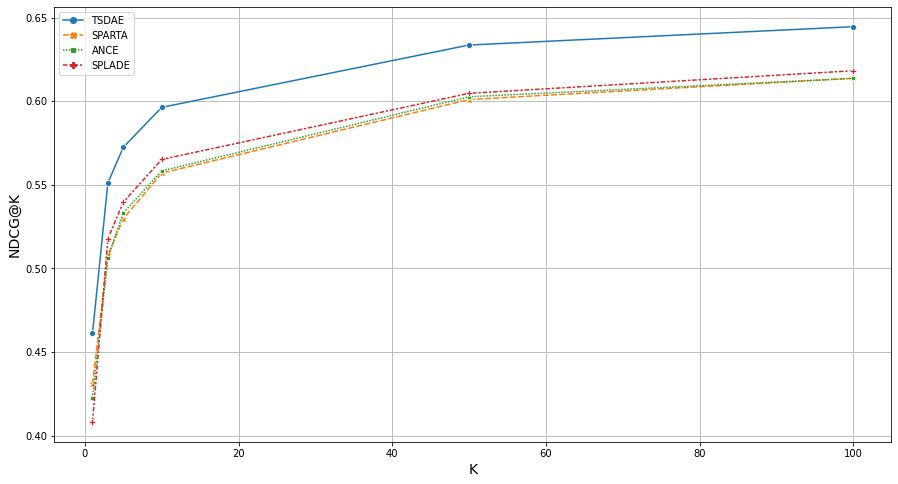

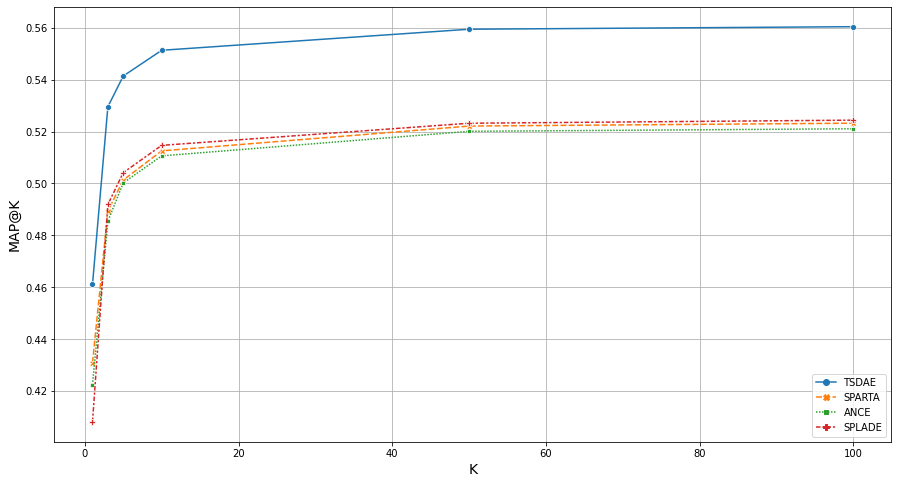

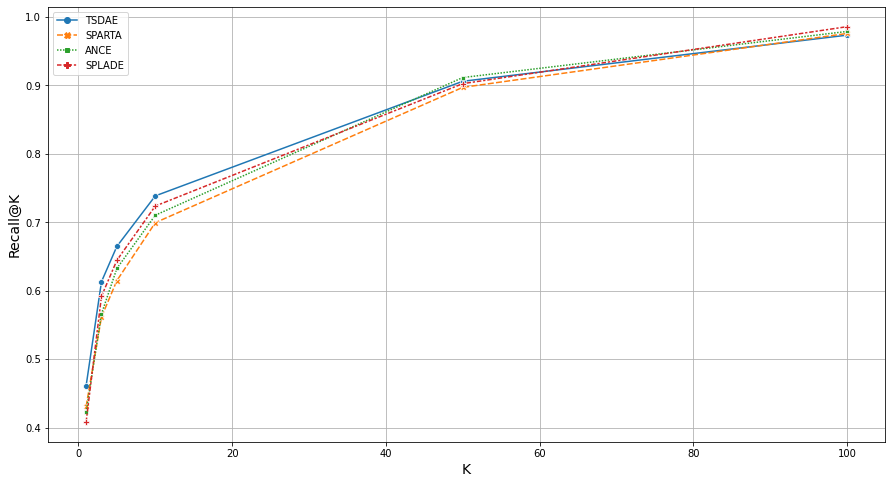

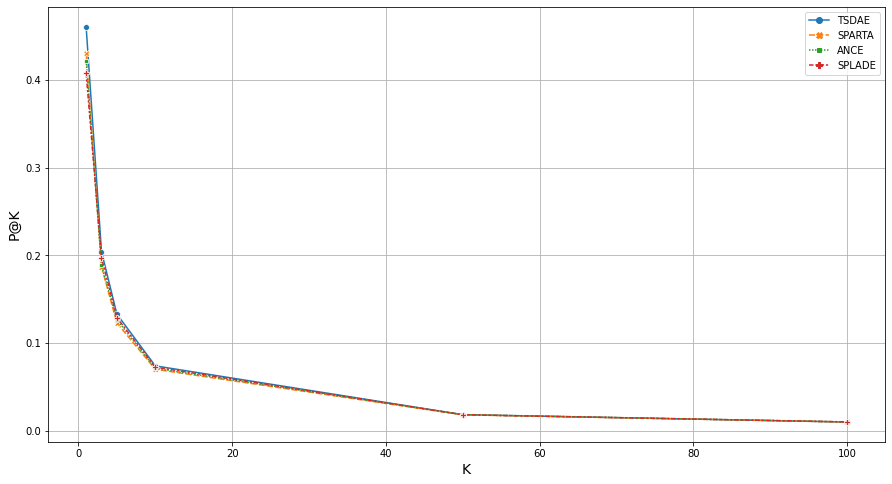

In [ ]:
metrics = ['NDCG', 'MAP', 'Recall', 'P']
for ind, metr in enumerate(metrics):
  draw(res_tsdae =total['TSDAE'][ind], res_sparta =total['SPARTA'][ind],
       res_ance =total['ANCE'][ind], res_splade=total['SPLADE'][ind], metric = metr, k_values = k_values)

In [ ]:
for ind, metric in enumerate(metrics):
  display(res_table_metric(res_tsdae =total['TSDAE'][ind], res_sparta =total['SPARTA'][ind],
        res_ance =total['ANCE'][ind], res_splade=total['SPLADE'][ind], metric = metric, k_values = k_values))

,TSDAE,SPARTA,ANCE,SPLADE
NDCG,,,,
NDCG@1,0.46112,0.43091,0.42249,0.40812
NDCG@3,0.55109,0.50796,0.50617,0.51770
NDCG@5,0.57236,0.52968,0.53315,0.53956
NDCG@10,0.59629,0.55699,0.55832,0.56513
NDCG@50,0.63356,0.60098,0.60263,0.60468
NDCG@100,0.64453,0.61371,0.61361,0.61820


,TSDAE,SPARTA,ANCE,SPLADE
MAP,,,,
MAP@1,0.46112,0.43091,0.42249,0.40812
MAP@3,0.52955,0.48935,0.48547,0.49191
MAP@5,0.54139,0.50134,0.50023,0.50417
MAP@10,0.55131,0.51256,0.51064,0.51469
MAP@50,0.55942,0.52212,0.52010,0.52321
MAP@100,0.56040,0.52323,0.52108,0.52440


,TSDAE,SPARTA,ANCE,SPLADE
Recall,,,,
Recall@1,0.46112,0.43091,0.42249,0.40812
Recall@3,0.61317,0.56166,0.56612,0.59188
Recall@5,0.66469,0.61466,0.63249,0.64438
Recall@10,0.73848,0.69936,0.71025,0.72363
Recall@50,0.90589,0.89698,0.91134,0.90243
Recall@100,0.97325,0.97573,0.97870,0.98564


,TSDAE,SPARTA,ANCE,SPLADE
P,,,,
P@1,0.46112,0.43091,0.42249,0.40812
P@3,0.20439,0.18722,0.18871,0.19729
P@5,0.13294,0.12293,0.12650,0.12888
P@10,0.07385,0.06994,0.07103,0.07236
P@50,0.01812,0.01794,0.01823,0.01805
P@100,0.00973,0.00976,0.00979,0.00986


## SQUAD

### train

In [ ]:
train_model(model_name[0], "squad", corpus_squad, slice_spec(queries_squad, 20, 1), qrels_squad)

2022-05-03 11:52:30 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/548 [00:00<?, ?it/s]

2022-05-03 11:52:30 - Loaded 4379 training pairs.
2022-05-03 11:52:31 - eval set contains 18891 documents and 4379 queries
2022-05-03 11:52:31 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/548 [00:00<?, ?it/s]

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[1], "squad", corpus_squad, slice(queries_squad), qrels_squad)

2022-05-02 12:31:15 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:31:15 - Loaded 1009 training pairs.
2022-05-02 12:31:15 - eval set contains 147 documents and 1009 queries
2022-05-02 12:31:15 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:33:58 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:34:04 - Queries: 1009
2022-05-02 12:34:04 - Corpus: 147

2022-05-02 12:34:04 - Score-Function: cos_sim
2022-05-02 12:34:04 - Accuracy@1: 35.88%
2022-05-02 12:34:04 - Accuracy@3: 51.34%
2022-05-02 12:34:04 - Accuracy@5: 56.69%
2022-05-02 12:34:04 - Accuracy@10: 66.20%
2022-05-02 12:34:04 - Precision@1: 35.88%
2022-05-02 12:34:04 - Precision@3: 17.11%
2022-05-02 12:34:04 - Precision@5: 11.34%
2022-05-02 12:34:04 - Precision@10: 6.62%
2022-05-02 12:34:04 - Recall@1: 35.88%
2022-05-02 12:34:04 - Recall@3: 51.34%
2022-05-02 12:34:04 - Recall@5: 56.69%
2022-05-02 12:34:04 - Recall@10: 66.20%
2022-05-02 12:34:04 - MRR@10: 0.4520
2022-05-02 12:34:04 - NDCG@10: 0.5021
2022-05-02 12:34:04 - MAP@100: 0.4640
2022-05-02 12:34:04 - Score-Function: dot_score
2022-05-02 12:34:04 - Accuracy@1: 36.37%
2022-05-02 12:34:04 - Accuracy@3: 51.44%
2022-05-02 12:34:04 - Accuracy@5: 57.28%
2022-05-02 12:34:04 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:36:47 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 12:36:53 - Queries: 1009
2022-05-02 12:36:53 - Corpus: 147

2022-05-02 12:36:53 - Score-Function: cos_sim
2022-05-02 12:36:53 - Accuracy@1: 61.25%
2022-05-02 12:36:53 - Accuracy@3: 80.77%
2022-05-02 12:36:53 - Accuracy@5: 86.12%
2022-05-02 12:36:53 - Accuracy@10: 90.68%
2022-05-02 12:36:53 - Precision@1: 61.25%
2022-05-02 12:36:53 - Precision@3: 26.92%
2022-05-02 12:36:53 - Precision@5: 17.22%
2022-05-02 12:36:53 - Precision@10: 9.07%
2022-05-02 12:36:53 - Recall@1: 61.25%
2022-05-02 12:36:53 - Recall@3: 80.77%
2022-05-02 12:36:53 - Recall@5: 86.12%
2022-05-02 12:36:53 - Recall@10: 90.68%
2022-05-02 12:36:53 - MRR@10: 0.7201
2022-05-02 12:36:53 - NDCG@10: 0.7659
2022-05-02 12:36:53 - MAP@100: 0.7246
2022-05-02 12:36:53 - Score-Function: dot_score
2022-05-02 12:36:53 - Accuracy@1: 68.29%
2022-05-02 12:36:53 - Accuracy@3: 82.46%
2022-05-02 12:36:53 - Accuracy@5: 86.12%
2022-05-02 12:36:53 - A

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[2], "squad", corpus_squad, slice(queries_squad), qrels_squad)

Downloading:   0%|          | 0.00/787 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

2022-05-02 12:40:17 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:40:17 - Loaded 1009 training pairs.
2022-05-02 12:40:17 - eval set contains 147 documents and 1009 queries
2022-05-02 12:40:17 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:45:16 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:45:26 - Queries: 1009
2022-05-02 12:45:26 - Corpus: 147

2022-05-02 12:45:26 - Score-Function: cos_sim
2022-05-02 12:45:26 - Accuracy@1: 43.41%
2022-05-02 12:45:26 - Accuracy@3: 59.17%
2022-05-02 12:45:26 - Accuracy@5: 66.70%
2022-05-02 12:45:26 - Accuracy@10: 74.23%
2022-05-02 12:45:26 - Precision@1: 43.41%
2022-05-02 12:45:26 - Precision@3: 19.72%
2022-05-02 12:45:26 - Precision@5: 13.34%
2022-05-02 12:45:26 - Precision@10: 7.42%
2022-05-02 12:45:26 - Recall@1: 43.41%
2022-05-02 12:45:26 - Recall@3: 59.17%
2022-05-02 12:45:26 - Recall@5: 66.70%
2022-05-02 12:45:26 - Recall@10: 74.23%
2022-05-02 12:45:26 - MRR@10: 0.5319
2022-05-02 12:45:26 - NDCG@10: 0.5823
2022-05-02 12:45:26 - MAP@100: 0.5407
2022-05-02 12:45:26 - Score-Function: dot_score
2022-05-02 12:45:26 - Accuracy@1: 46.68%
2022-05-02 12:45:26 - Accuracy@3: 61.35%
2022-05-02 12:45:26 - Accuracy@5: 67.39%
2022-05-02 12:45:26 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:50:25 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 12:50:36 - Queries: 1009
2022-05-02 12:50:36 - Corpus: 147

2022-05-02 12:50:36 - Score-Function: cos_sim
2022-05-02 12:50:36 - Accuracy@1: 63.33%
2022-05-02 12:50:36 - Accuracy@3: 78.69%
2022-05-02 12:50:36 - Accuracy@5: 84.94%
2022-05-02 12:50:36 - Accuracy@10: 89.69%
2022-05-02 12:50:36 - Precision@1: 63.33%
2022-05-02 12:50:36 - Precision@3: 26.23%
2022-05-02 12:50:36 - Precision@5: 16.99%
2022-05-02 12:50:36 - Precision@10: 8.97%
2022-05-02 12:50:36 - Recall@1: 63.33%
2022-05-02 12:50:36 - Recall@3: 78.69%
2022-05-02 12:50:36 - Recall@5: 84.94%
2022-05-02 12:50:36 - Recall@10: 89.69%
2022-05-02 12:50:36 - MRR@10: 0.7212
2022-05-02 12:50:36 - NDCG@10: 0.7639
2022-05-02 12:50:36 - MAP@100: 0.7258
2022-05-02 12:50:36 - Score-Function: dot_score
2022-05-02 12:50:36 - Accuracy@1: 63.63%
2022-05-02 12:50:36 - Accuracy@3: 81.37%
2022-05-02 12:50:36 - Accuracy@5: 87.22%
2022-05-02 12:50:36 - A

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[3], "squad", corpus_squad, slice(queries_squad), qrels_squad)

Downloading:   0%|          | 0.00/601 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/917M [00:00<?, ?B/s]

Some weights of the model checkpoint at vocab-transformers/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

2022-05-02 12:55:11 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:55:11 - Loaded 1009 training pairs.
2022-05-02 12:55:11 - eval set contains 147 documents and 1009 queries
2022-05-02 12:55:11 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:58:02 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:58:07 - Queries: 1009
2022-05-02 12:58:07 - Corpus: 147

2022-05-02 12:58:08 - Score-Function: cos_sim
2022-05-02 12:58:08 - Accuracy@1: 40.34%
2022-05-02 12:58:08 - Accuracy@3: 58.47%
2022-05-02 12:58:08 - Accuracy@5: 64.12%
2022-05-02 12:58:08 - Accuracy@10: 73.54%
2022-05-02 12:58:08 - Precision@1: 40.34%
2022-05-02 12:58:08 - Precision@3: 19.49%
2022-05-02 12:58:08 - Precision@5: 12.82%
2022-05-02 12:58:08 - Precision@10: 7.35%
2022-05-02 12:58:08 - Recall@1: 40.34%
2022-05-02 12:58:08 - Recall@3: 58.47%
2022-05-02 12:58:08 - Recall@5: 64.12%
2022-05-02 12:58:08 - Recall@10: 73.54%
2022-05-02 12:58:08 - MRR@10: 0.5109
2022-05-02 12:58:08 - NDCG@10: 0.5648
2022-05-02 12:58:08 - MAP@100: 0.5214
2022-05-02 12:58:08 - Score-Function: dot_score
2022-05-02 12:58:08 - Accuracy@1: 40.44%
2022-05-02 12:58:08 - Accuracy@3: 59.96%
2022-05-02 12:58:08 - Accuracy@5: 67.39%
2022-05-02 12:58:08 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 13:01:02 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 13:01:07 - Queries: 1009
2022-05-02 13:01:07 - Corpus: 147

2022-05-02 13:01:08 - Score-Function: cos_sim
2022-05-02 13:01:08 - Accuracy@1: 55.60%
2022-05-02 13:01:08 - Accuracy@3: 78.89%
2022-05-02 13:01:08 - Accuracy@5: 84.14%
2022-05-02 13:01:08 - Accuracy@10: 91.28%
2022-05-02 13:01:08 - Precision@1: 55.60%
2022-05-02 13:01:08 - Precision@3: 26.30%
2022-05-02 13:01:08 - Precision@5: 16.83%
2022-05-02 13:01:08 - Precision@10: 9.13%
2022-05-02 13:01:08 - Recall@1: 55.60%
2022-05-02 13:01:08 - Recall@3: 78.89%
2022-05-02 13:01:08 - Recall@5: 84.14%
2022-05-02 13:01:08 - Recall@10: 91.28%
2022-05-02 13:01:08 - MRR@10: 0.6841
2022-05-02 13:01:08 - NDCG@10: 0.7398
2022-05-02 13:01:08 - MAP@100: 0.6887
2022-05-02 13:01:08 - Score-Function: dot_score
2022-05-02 13:01:08 - Accuracy@1: 60.06%
2022-05-02 13:01:08 - Accuracy@3: 80.57%
2022-05-02 13:01:08 - Accuracy@5: 85.33%
2022-05-02 13:01:08 - A

In [ ]:
torch.cuda.empty_cache()

### test

In [ ]:
total = {}

In [ ]:
total[models_[0]] = evaluate_model("/content/drive/MyDrive/covid_models/TSDAE-scidocs-v1-covidQA", corpus_squad, queries_squad, qrels_squad)

2022-05-03 08:32:47 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/TSDAE-scidocs-v1-covidQA
2022-05-03 08:32:49 - Use pytorch device: cuda
2022-05-03 08:32:49 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:32:55 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:32:55 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:32:55 - Scoring Function: Dot Product (dot)
2022-05-03 08:32:55 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:03 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - NDCG@1: 0.4611
2022-05-03 08:33:03 - NDCG@3: 0.5511
2022-05-03 08:33:03 - NDCG@5: 0.5724
2022-05-03 08:33:03 - NDCG@10: 0.5963
2022-05-03 08:33:03 - NDCG@50: 0.6336
2022-05-03 08:33:03 - NDCG@100: 0.6445
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - MAP@1: 0.4611
2022-05-03 08:33:03 - MAP@3: 0.5295
2022-05-03 08:33:03 - MAP@5: 0.5414
2022-05-03 08:33:03 - MAP@10: 0.5513
2022-05-03 08:33:03 - MAP@50: 0.5594
2022-05-03 08:33:03 - MAP@100: 0.5604
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - Recall@1: 0.4611
2022-05-03 08:33:03 - Recall@3: 0.6132
2022-05-03 08:33:03 - Recall@5: 0.6647
2022-05-03 08:33:03 - Recall@10: 0.7385
2022-05-03 08:33:03 - Recall@50: 0.9059
2022-05-03 08:33:03 - Recall@100: 0.9732
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - P@1: 0.4611
2022-05-03 08:33:03 - P@3: 0.2044
2022-05-03 08:33:03 - P@5: 0.1329
2022-05-03 08:33:03 - P@10: 0.0738
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[1]] = evaluate_model("/content/drive/MyDrive/covid_models/sparta-msmarco-distilbert-base-v1-v1-covidQA",  corpus_squad, queries_squad, qrels_squad)

2022-05-03 08:33:03 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/sparta-msmarco-distilbert-base-v1-v1-covidQA
2022-05-03 08:33:05 - Use pytorch device: cuda
2022-05-03 08:33:05 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:08 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:08 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:08 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:08 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:13 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - NDCG@1: 0.4309
2022-05-03 08:33:13 - NDCG@3: 0.5080
2022-05-03 08:33:13 - NDCG@5: 0.5297
2022-05-03 08:33:13 - NDCG@10: 0.5570
2022-05-03 08:33:13 - NDCG@50: 0.6010
2022-05-03 08:33:13 - NDCG@100: 0.6137
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - MAP@1: 0.4309
2022-05-03 08:33:13 - MAP@3: 0.4894
2022-05-03 08:33:13 - MAP@5: 0.5013
2022-05-03 08:33:13 - MAP@10: 0.5126
2022-05-03 08:33:13 - MAP@50: 0.5221
2022-05-03 08:33:13 - MAP@100: 0.5232
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - Recall@1: 0.4309
2022-05-03 08:33:13 - Recall@3: 0.5617
2022-05-03 08:33:13 - Recall@5: 0.6147
2022-05-03 08:33:13 - Recall@10: 0.6994
2022-05-03 08:33:13 - Recall@50: 0.8970
2022-05-03 08:33:13 - Recall@100: 0.9757
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - P@1: 0.4309
2022-05-03 08:33:13 - P@3: 0.1872
2022-05-03 08:33:13 - P@5: 0.1229
2022-05-03 08:33:13 - P@10: 0.0699
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[2]] = evaluate_model("/content/drive/MyDrive/covid_models/msmarco-roberta-base-ance-firstp-v1-covidQA",  corpus_squad, queries_squad, qrels_squad)

2022-05-03 08:33:13 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/msmarco-roberta-base-ance-firstp-v1-covidQA
2022-05-03 08:33:17 - Use pytorch device: cuda
2022-05-03 08:33:17 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:23 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:23 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:23 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:23 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:31 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - NDCG@1: 0.4225
2022-05-03 08:33:31 - NDCG@3: 0.5062
2022-05-03 08:33:31 - NDCG@5: 0.5332
2022-05-03 08:33:31 - NDCG@10: 0.5583
2022-05-03 08:33:31 - NDCG@50: 0.6026
2022-05-03 08:33:31 - NDCG@100: 0.6136
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - MAP@1: 0.4225
2022-05-03 08:33:31 - MAP@3: 0.4855
2022-05-03 08:33:31 - MAP@5: 0.5002
2022-05-03 08:33:31 - MAP@10: 0.5106
2022-05-03 08:33:31 - MAP@50: 0.5201
2022-05-03 08:33:31 - MAP@100: 0.5211
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - Recall@1: 0.4225
2022-05-03 08:33:31 - Recall@3: 0.5661
2022-05-03 08:33:31 - Recall@5: 0.6325
2022-05-03 08:33:31 - Recall@10: 0.7103
2022-05-03 08:33:31 - Recall@50: 0.9113
2022-05-03 08:33:31 - Recall@100: 0.9787
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - P@1: 0.4225
2022-05-03 08:33:31 - P@3: 0.1887
2022-05-03 08:33:31 - P@5: 0.1265
2022-05-03 08:33:31 - P@10: 0.0710
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[3]] = evaluate_model("/content/drive/MyDrive/covid_models/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated-v1-covidQA", corpus_squad, queries_squad, qrels_squad)

2022-05-03 08:33:31 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated-v1-covidQA
2022-05-03 08:33:36 - Use pytorch device: cuda
2022-05-03 08:33:36 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:38 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:38 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:38 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:38 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:43 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - NDCG@1: 0.4081
2022-05-03 08:33:43 - NDCG@3: 0.5177
2022-05-03 08:33:43 - NDCG@5: 0.5396
2022-05-03 08:33:43 - NDCG@10: 0.5651
2022-05-03 08:33:43 - NDCG@50: 0.6047
2022-05-03 08:33:43 - NDCG@100: 0.6182
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - MAP@1: 0.4081
2022-05-03 08:33:43 - MAP@3: 0.4919
2022-05-03 08:33:43 - MAP@5: 0.5042
2022-05-03 08:33:43 - MAP@10: 0.5147
2022-05-03 08:33:43 - MAP@50: 0.5232
2022-05-03 08:33:43 - MAP@100: 0.5244
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - Recall@1: 0.4081
2022-05-03 08:33:43 - Recall@3: 0.5919
2022-05-03 08:33:43 - Recall@5: 0.6444
2022-05-03 08:33:43 - Recall@10: 0.7236
2022-05-03 08:33:43 - Recall@50: 0.9024
2022-05-03 08:33:43 - Recall@100: 0.9856
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - P@1: 0.4081
2022-05-03 08:33:43 - P@3: 0.1973
2022-05-03 08:33:43 - P@5: 0.1289
2022-05-03 08:33:43 - P@10: 0.0724
2022-05

In [ ]:
torch.cuda.empty_cache()

### res

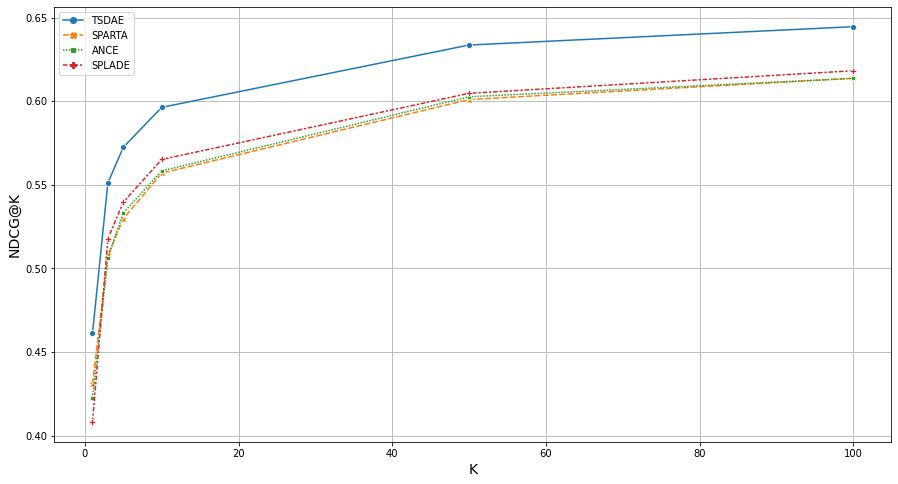

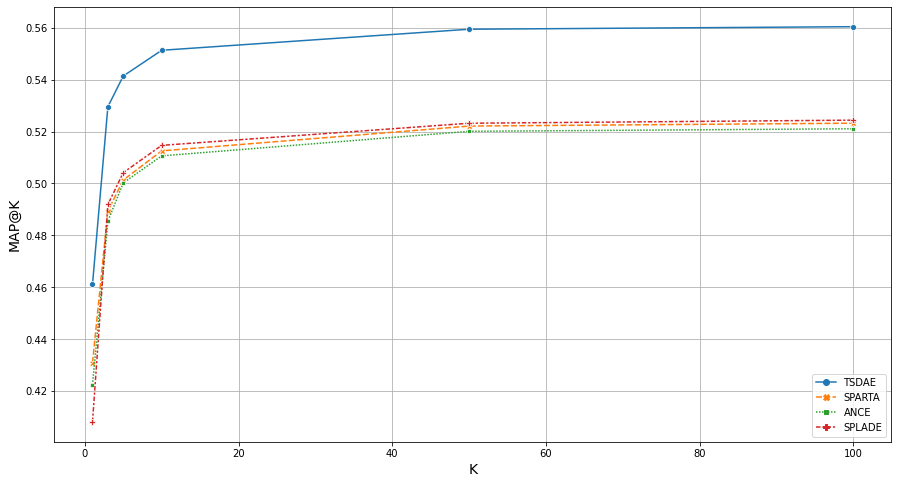

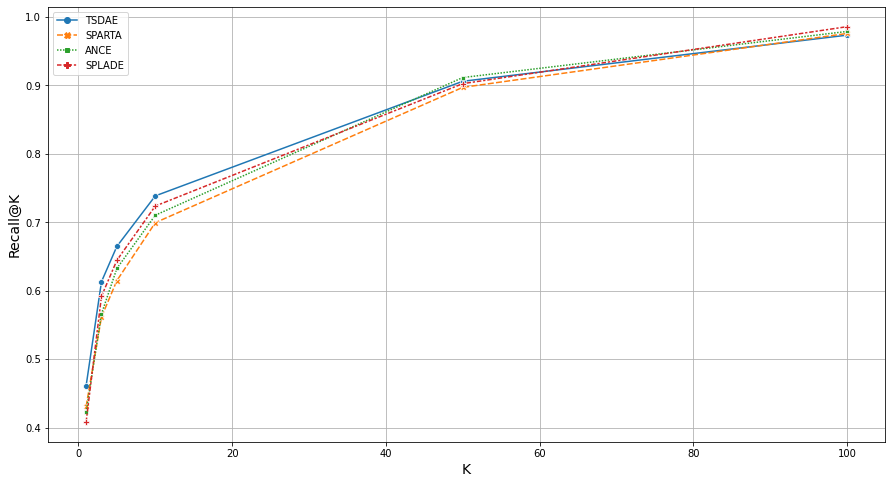

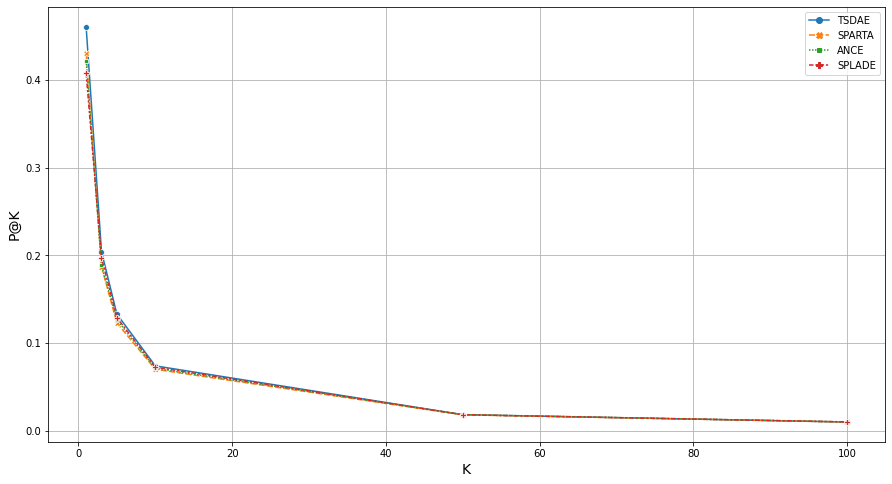

In [ ]:
metrics = ['NDCG', 'MAP', 'Recall', 'P']
for ind, metr in enumerate(metrics):
  draw(res_tsdae =total['TSDAE'][ind], res_sparta =total['SPARTA'][ind],
       res_ance =total['ANCE'][ind], res_splade=total['SPLADE'][ind], metric = metr, k_values = k_values)

In [ ]:
for ind, metric in enumerate(metrics):
  display(res_table_metric(res_tsdae =total['TSDAE'][ind], res_sparta =total['SPARTA'][ind],
        res_ance =total['ANCE'][ind], res_splade=total['SPLADE'][ind], metric = metric, k_values = k_values))

,TSDAE,SPARTA,ANCE,SPLADE
NDCG,,,,
NDCG@1,0.46112,0.43091,0.42249,0.40812
NDCG@3,0.55109,0.50796,0.50617,0.51770
NDCG@5,0.57236,0.52968,0.53315,0.53956
NDCG@10,0.59629,0.55699,0.55832,0.56513
NDCG@50,0.63356,0.60098,0.60263,0.60468
NDCG@100,0.64453,0.61371,0.61361,0.61820


,TSDAE,SPARTA,ANCE,SPLADE
MAP,,,,
MAP@1,0.46112,0.43091,0.42249,0.40812
MAP@3,0.52955,0.48935,0.48547,0.49191
MAP@5,0.54139,0.50134,0.50023,0.50417
MAP@10,0.55131,0.51256,0.51064,0.51469
MAP@50,0.55942,0.52212,0.52010,0.52321
MAP@100,0.56040,0.52323,0.52108,0.52440


,TSDAE,SPARTA,ANCE,SPLADE
Recall,,,,
Recall@1,0.46112,0.43091,0.42249,0.40812
Recall@3,0.61317,0.56166,0.56612,0.59188
Recall@5,0.66469,0.61466,0.63249,0.64438
Recall@10,0.73848,0.69936,0.71025,0.72363
Recall@50,0.90589,0.89698,0.91134,0.90243
Recall@100,0.97325,0.97573,0.97870,0.98564


,TSDAE,SPARTA,ANCE,SPLADE
P,,,,
P@1,0.46112,0.43091,0.42249,0.40812
P@3,0.20439,0.18722,0.18871,0.19729
P@5,0.13294,0.12293,0.12650,0.12888
P@10,0.07385,0.06994,0.07103,0.07236
P@50,0.01812,0.01794,0.01823,0.01805
P@100,0.00973,0.00976,0.00979,0.00986


## RuBQ

### train

In [ ]:
train_model(model_name[0], "ru_bq", corpus_ru, slice(queries_ru), qrels_ru)

Downloading:   0%|          | 0.00/462 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/168 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

2022-05-03 09:08:59 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/5475 [00:00<?, ?it/s]

2022-05-03 09:09:00 - Loaded 43799 training pairs.
2022-05-03 09:09:01 - eval set contains 18891 documents and 43799 queries
2022-05-03 09:09:01 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5475 [00:00<?, ?it/s]

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[1], "ru_bq", corpus_ru, slice(queries_ru), qrels_ru)

2022-05-02 12:31:15 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:31:15 - Loaded 1009 training pairs.
2022-05-02 12:31:15 - eval set contains 147 documents and 1009 queries
2022-05-02 12:31:15 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:33:58 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:34:04 - Queries: 1009
2022-05-02 12:34:04 - Corpus: 147

2022-05-02 12:34:04 - Score-Function: cos_sim
2022-05-02 12:34:04 - Accuracy@1: 35.88%
2022-05-02 12:34:04 - Accuracy@3: 51.34%
2022-05-02 12:34:04 - Accuracy@5: 56.69%
2022-05-02 12:34:04 - Accuracy@10: 66.20%
2022-05-02 12:34:04 - Precision@1: 35.88%
2022-05-02 12:34:04 - Precision@3: 17.11%
2022-05-02 12:34:04 - Precision@5: 11.34%
2022-05-02 12:34:04 - Precision@10: 6.62%
2022-05-02 12:34:04 - Recall@1: 35.88%
2022-05-02 12:34:04 - Recall@3: 51.34%
2022-05-02 12:34:04 - Recall@5: 56.69%
2022-05-02 12:34:04 - Recall@10: 66.20%
2022-05-02 12:34:04 - MRR@10: 0.4520
2022-05-02 12:34:04 - NDCG@10: 0.5021
2022-05-02 12:34:04 - MAP@100: 0.4640
2022-05-02 12:34:04 - Score-Function: dot_score
2022-05-02 12:34:04 - Accuracy@1: 36.37%
2022-05-02 12:34:04 - Accuracy@3: 51.44%
2022-05-02 12:34:04 - Accuracy@5: 57.28%
2022-05-02 12:34:04 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:36:47 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 12:36:53 - Queries: 1009
2022-05-02 12:36:53 - Corpus: 147

2022-05-02 12:36:53 - Score-Function: cos_sim
2022-05-02 12:36:53 - Accuracy@1: 61.25%
2022-05-02 12:36:53 - Accuracy@3: 80.77%
2022-05-02 12:36:53 - Accuracy@5: 86.12%
2022-05-02 12:36:53 - Accuracy@10: 90.68%
2022-05-02 12:36:53 - Precision@1: 61.25%
2022-05-02 12:36:53 - Precision@3: 26.92%
2022-05-02 12:36:53 - Precision@5: 17.22%
2022-05-02 12:36:53 - Precision@10: 9.07%
2022-05-02 12:36:53 - Recall@1: 61.25%
2022-05-02 12:36:53 - Recall@3: 80.77%
2022-05-02 12:36:53 - Recall@5: 86.12%
2022-05-02 12:36:53 - Recall@10: 90.68%
2022-05-02 12:36:53 - MRR@10: 0.7201
2022-05-02 12:36:53 - NDCG@10: 0.7659
2022-05-02 12:36:53 - MAP@100: 0.7246
2022-05-02 12:36:53 - Score-Function: dot_score
2022-05-02 12:36:53 - Accuracy@1: 68.29%
2022-05-02 12:36:53 - Accuracy@3: 82.46%
2022-05-02 12:36:53 - Accuracy@5: 86.12%
2022-05-02 12:36:53 - A

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[2], "ru_bq", corpus_ru, slice(queries_ru), qrels_ru)

Downloading:   0%|          | 0.00/787 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

2022-05-02 12:40:17 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:40:17 - Loaded 1009 training pairs.
2022-05-02 12:40:17 - eval set contains 147 documents and 1009 queries
2022-05-02 12:40:17 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:45:16 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:45:26 - Queries: 1009
2022-05-02 12:45:26 - Corpus: 147

2022-05-02 12:45:26 - Score-Function: cos_sim
2022-05-02 12:45:26 - Accuracy@1: 43.41%
2022-05-02 12:45:26 - Accuracy@3: 59.17%
2022-05-02 12:45:26 - Accuracy@5: 66.70%
2022-05-02 12:45:26 - Accuracy@10: 74.23%
2022-05-02 12:45:26 - Precision@1: 43.41%
2022-05-02 12:45:26 - Precision@3: 19.72%
2022-05-02 12:45:26 - Precision@5: 13.34%
2022-05-02 12:45:26 - Precision@10: 7.42%
2022-05-02 12:45:26 - Recall@1: 43.41%
2022-05-02 12:45:26 - Recall@3: 59.17%
2022-05-02 12:45:26 - Recall@5: 66.70%
2022-05-02 12:45:26 - Recall@10: 74.23%
2022-05-02 12:45:26 - MRR@10: 0.5319
2022-05-02 12:45:26 - NDCG@10: 0.5823
2022-05-02 12:45:26 - MAP@100: 0.5407
2022-05-02 12:45:26 - Score-Function: dot_score
2022-05-02 12:45:26 - Accuracy@1: 46.68%
2022-05-02 12:45:26 - Accuracy@3: 61.35%
2022-05-02 12:45:26 - Accuracy@5: 67.39%
2022-05-02 12:45:26 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:50:25 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 12:50:36 - Queries: 1009
2022-05-02 12:50:36 - Corpus: 147

2022-05-02 12:50:36 - Score-Function: cos_sim
2022-05-02 12:50:36 - Accuracy@1: 63.33%
2022-05-02 12:50:36 - Accuracy@3: 78.69%
2022-05-02 12:50:36 - Accuracy@5: 84.94%
2022-05-02 12:50:36 - Accuracy@10: 89.69%
2022-05-02 12:50:36 - Precision@1: 63.33%
2022-05-02 12:50:36 - Precision@3: 26.23%
2022-05-02 12:50:36 - Precision@5: 16.99%
2022-05-02 12:50:36 - Precision@10: 8.97%
2022-05-02 12:50:36 - Recall@1: 63.33%
2022-05-02 12:50:36 - Recall@3: 78.69%
2022-05-02 12:50:36 - Recall@5: 84.94%
2022-05-02 12:50:36 - Recall@10: 89.69%
2022-05-02 12:50:36 - MRR@10: 0.7212
2022-05-02 12:50:36 - NDCG@10: 0.7639
2022-05-02 12:50:36 - MAP@100: 0.7258
2022-05-02 12:50:36 - Score-Function: dot_score
2022-05-02 12:50:36 - Accuracy@1: 63.63%
2022-05-02 12:50:36 - Accuracy@3: 81.37%
2022-05-02 12:50:36 - Accuracy@5: 87.22%
2022-05-02 12:50:36 - A

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_model(model_name[3], "ru_bq", corpus_ru, slice(queries_ru), qrels_ru)

Downloading:   0%|          | 0.00/601 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/917M [00:00<?, ?B/s]

Some weights of the model checkpoint at vocab-transformers/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

2022-05-02 12:55:11 - Use pytorch device: cuda


Adding Input Examples:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:55:11 - Loaded 1009 training pairs.
2022-05-02 12:55:11 - eval set contains 147 documents and 1009 queries
2022-05-02 12:55:11 - Starting to Train...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 12:58:02 - Information Retrieval Evaluation on eval dataset after epoch 0:
2022-05-02 12:58:07 - Queries: 1009
2022-05-02 12:58:07 - Corpus: 147

2022-05-02 12:58:08 - Score-Function: cos_sim
2022-05-02 12:58:08 - Accuracy@1: 40.34%
2022-05-02 12:58:08 - Accuracy@3: 58.47%
2022-05-02 12:58:08 - Accuracy@5: 64.12%
2022-05-02 12:58:08 - Accuracy@10: 73.54%
2022-05-02 12:58:08 - Precision@1: 40.34%
2022-05-02 12:58:08 - Precision@3: 19.49%
2022-05-02 12:58:08 - Precision@5: 12.82%
2022-05-02 12:58:08 - Precision@10: 7.35%
2022-05-02 12:58:08 - Recall@1: 40.34%
2022-05-02 12:58:08 - Recall@3: 58.47%
2022-05-02 12:58:08 - Recall@5: 64.12%
2022-05-02 12:58:08 - Recall@10: 73.54%
2022-05-02 12:58:08 - MRR@10: 0.5109
2022-05-02 12:58:08 - NDCG@10: 0.5648
2022-05-02 12:58:08 - MAP@100: 0.5214
2022-05-02 12:58:08 - Score-Function: dot_score
2022-05-02 12:58:08 - Accuracy@1: 40.44%
2022-05-02 12:58:08 - Accuracy@3: 59.96%
2022-05-02 12:58:08 - Accuracy@5: 67.39%
2022-05-02 12:58:08 - A

Iteration:   0%|          | 0/127 [00:00<?, ?it/s]

2022-05-02 13:01:02 - Information Retrieval Evaluation on eval dataset after epoch 1:
2022-05-02 13:01:07 - Queries: 1009
2022-05-02 13:01:07 - Corpus: 147

2022-05-02 13:01:08 - Score-Function: cos_sim
2022-05-02 13:01:08 - Accuracy@1: 55.60%
2022-05-02 13:01:08 - Accuracy@3: 78.89%
2022-05-02 13:01:08 - Accuracy@5: 84.14%
2022-05-02 13:01:08 - Accuracy@10: 91.28%
2022-05-02 13:01:08 - Precision@1: 55.60%
2022-05-02 13:01:08 - Precision@3: 26.30%
2022-05-02 13:01:08 - Precision@5: 16.83%
2022-05-02 13:01:08 - Precision@10: 9.13%
2022-05-02 13:01:08 - Recall@1: 55.60%
2022-05-02 13:01:08 - Recall@3: 78.89%
2022-05-02 13:01:08 - Recall@5: 84.14%
2022-05-02 13:01:08 - Recall@10: 91.28%
2022-05-02 13:01:08 - MRR@10: 0.6841
2022-05-02 13:01:08 - NDCG@10: 0.7398
2022-05-02 13:01:08 - MAP@100: 0.6887
2022-05-02 13:01:08 - Score-Function: dot_score
2022-05-02 13:01:08 - Accuracy@1: 60.06%
2022-05-02 13:01:08 - Accuracy@3: 80.57%
2022-05-02 13:01:08 - Accuracy@5: 85.33%
2022-05-02 13:01:08 - A

In [ ]:
torch.cuda.empty_cache()

### test

In [ ]:
total = {}

In [ ]:
total[models_[0]] = evaluate_model("/content/drive/MyDrive/covid_models/TSDAE-scidocs-v1-covidQA", corpus_ru, queries_ru, qrels_ru)

2022-05-03 08:32:47 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/TSDAE-scidocs-v1-covidQA
2022-05-03 08:32:49 - Use pytorch device: cuda
2022-05-03 08:32:49 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:32:55 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:32:55 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:32:55 - Scoring Function: Dot Product (dot)
2022-05-03 08:32:55 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:03 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - NDCG@1: 0.4611
2022-05-03 08:33:03 - NDCG@3: 0.5511
2022-05-03 08:33:03 - NDCG@5: 0.5724
2022-05-03 08:33:03 - NDCG@10: 0.5963
2022-05-03 08:33:03 - NDCG@50: 0.6336
2022-05-03 08:33:03 - NDCG@100: 0.6445
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - MAP@1: 0.4611
2022-05-03 08:33:03 - MAP@3: 0.5295
2022-05-03 08:33:03 - MAP@5: 0.5414
2022-05-03 08:33:03 - MAP@10: 0.5513
2022-05-03 08:33:03 - MAP@50: 0.5594
2022-05-03 08:33:03 - MAP@100: 0.5604
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - Recall@1: 0.4611
2022-05-03 08:33:03 - Recall@3: 0.6132
2022-05-03 08:33:03 - Recall@5: 0.6647
2022-05-03 08:33:03 - Recall@10: 0.7385
2022-05-03 08:33:03 - Recall@50: 0.9059
2022-05-03 08:33:03 - Recall@100: 0.9732
2022-05-03 08:33:03 - 

2022-05-03 08:33:03 - P@1: 0.4611
2022-05-03 08:33:03 - P@3: 0.2044
2022-05-03 08:33:03 - P@5: 0.1329
2022-05-03 08:33:03 - P@10: 0.0738
2022-05

In [ ]:
torch.cuda.empty_cache() 

In [ ]:
total[models_[1]] = evaluate_model("/content/drive/MyDrive/covid_models/sparta-msmarco-distilbert-base-v1-v1-covidQA",  corpus_ru, queries_ru, qrels_ru)

2022-05-03 08:33:03 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/sparta-msmarco-distilbert-base-v1-v1-covidQA
2022-05-03 08:33:05 - Use pytorch device: cuda
2022-05-03 08:33:05 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:08 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:08 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:08 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:08 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:13 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - NDCG@1: 0.4309
2022-05-03 08:33:13 - NDCG@3: 0.5080
2022-05-03 08:33:13 - NDCG@5: 0.5297
2022-05-03 08:33:13 - NDCG@10: 0.5570
2022-05-03 08:33:13 - NDCG@50: 0.6010
2022-05-03 08:33:13 - NDCG@100: 0.6137
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - MAP@1: 0.4309
2022-05-03 08:33:13 - MAP@3: 0.4894
2022-05-03 08:33:13 - MAP@5: 0.5013
2022-05-03 08:33:13 - MAP@10: 0.5126
2022-05-03 08:33:13 - MAP@50: 0.5221
2022-05-03 08:33:13 - MAP@100: 0.5232
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - Recall@1: 0.4309
2022-05-03 08:33:13 - Recall@3: 0.5617
2022-05-03 08:33:13 - Recall@5: 0.6147
2022-05-03 08:33:13 - Recall@10: 0.6994
2022-05-03 08:33:13 - Recall@50: 0.8970
2022-05-03 08:33:13 - Recall@100: 0.9757
2022-05-03 08:33:13 - 

2022-05-03 08:33:13 - P@1: 0.4309
2022-05-03 08:33:13 - P@3: 0.1872
2022-05-03 08:33:13 - P@5: 0.1229
2022-05-03 08:33:13 - P@10: 0.0699
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[2]] = evaluate_model("/content/drive/MyDrive/covid_models/msmarco-roberta-base-ance-firstp-v1-covidQA",  corpus_ru, queries_ru, qrels_ru)

2022-05-03 08:33:13 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/msmarco-roberta-base-ance-firstp-v1-covidQA
2022-05-03 08:33:17 - Use pytorch device: cuda
2022-05-03 08:33:17 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:23 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:23 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:23 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:23 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:31 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - NDCG@1: 0.4225
2022-05-03 08:33:31 - NDCG@3: 0.5062
2022-05-03 08:33:31 - NDCG@5: 0.5332
2022-05-03 08:33:31 - NDCG@10: 0.5583
2022-05-03 08:33:31 - NDCG@50: 0.6026
2022-05-03 08:33:31 - NDCG@100: 0.6136
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - MAP@1: 0.4225
2022-05-03 08:33:31 - MAP@3: 0.4855
2022-05-03 08:33:31 - MAP@5: 0.5002
2022-05-03 08:33:31 - MAP@10: 0.5106
2022-05-03 08:33:31 - MAP@50: 0.5201
2022-05-03 08:33:31 - MAP@100: 0.5211
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - Recall@1: 0.4225
2022-05-03 08:33:31 - Recall@3: 0.5661
2022-05-03 08:33:31 - Recall@5: 0.6325
2022-05-03 08:33:31 - Recall@10: 0.7103
2022-05-03 08:33:31 - Recall@50: 0.9113
2022-05-03 08:33:31 - Recall@100: 0.9787
2022-05-03 08:33:31 - 

2022-05-03 08:33:31 - P@1: 0.4225
2022-05-03 08:33:31 - P@3: 0.1887
2022-05-03 08:33:31 - P@5: 0.1265
2022-05-03 08:33:31 - P@10: 0.0710
2022-05

In [ ]:
torch.cuda.empty_cache()

In [ ]:
total[models_[3]] = evaluate_model("/content/drive/MyDrive/covid_models/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated-v1-covidQA",corpus_ru, queries_ru, qrels_ru)

2022-05-03 08:33:31 - Load pretrained SentenceTransformer: /content/drive/MyDrive/covid_models/splade_100k-msmarco-distilbert-word2vec256k-MLM_785k_emb_updated-v1-covidQA
2022-05-03 08:33:36 - Use pytorch device: cuda
2022-05-03 08:33:36 - Encoding Queries...


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-05-03 08:33:38 - Sorting Corpus by document length (Longest first)...
2022-05-03 08:33:38 - Encoding Corpus in batches... Warning: This might take a while!
2022-05-03 08:33:38 - Scoring Function: Dot Product (dot)
2022-05-03 08:33:38 - Encoding Batch 1/1...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-05-03 08:33:43 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - NDCG@1: 0.4081
2022-05-03 08:33:43 - NDCG@3: 0.5177
2022-05-03 08:33:43 - NDCG@5: 0.5396
2022-05-03 08:33:43 - NDCG@10: 0.5651
2022-05-03 08:33:43 - NDCG@50: 0.6047
2022-05-03 08:33:43 - NDCG@100: 0.6182
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - MAP@1: 0.4081
2022-05-03 08:33:43 - MAP@3: 0.4919
2022-05-03 08:33:43 - MAP@5: 0.5042
2022-05-03 08:33:43 - MAP@10: 0.5147
2022-05-03 08:33:43 - MAP@50: 0.5232
2022-05-03 08:33:43 - MAP@100: 0.5244
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - Recall@1: 0.4081
2022-05-03 08:33:43 - Recall@3: 0.5919
2022-05-03 08:33:43 - Recall@5: 0.6444
2022-05-03 08:33:43 - Recall@10: 0.7236
2022-05-03 08:33:43 - Recall@50: 0.9024
2022-05-03 08:33:43 - Recall@100: 0.9856
2022-05-03 08:33:43 - 

2022-05-03 08:33:43 - P@1: 0.4081
2022-05-03 08:33:43 - P@3: 0.1973
2022-05-03 08:33:43 - P@5: 0.1289
2022-05-03 08:33:43 - P@10: 0.0724
2022-05

In [ ]:
torch.cuda.empty_cache()

### res

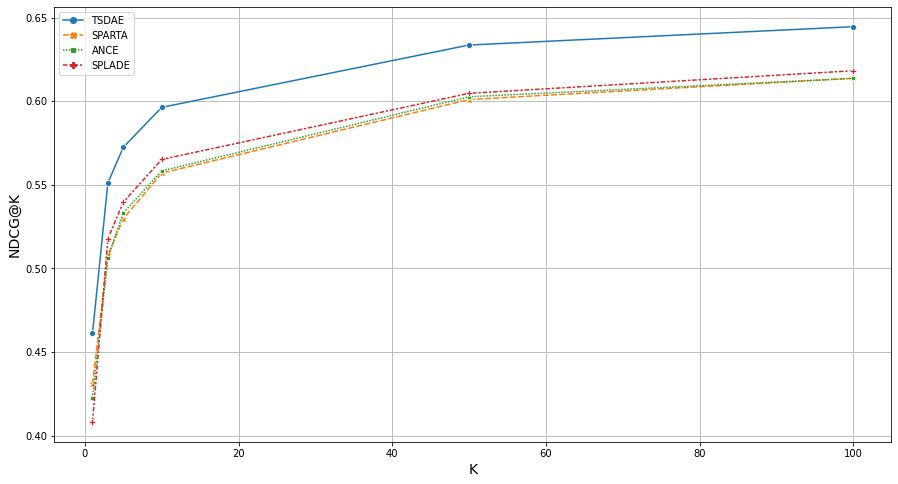

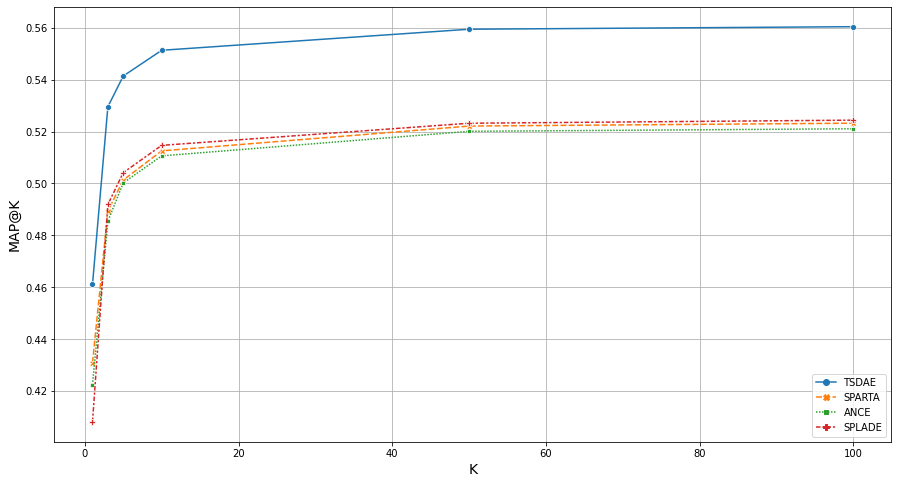

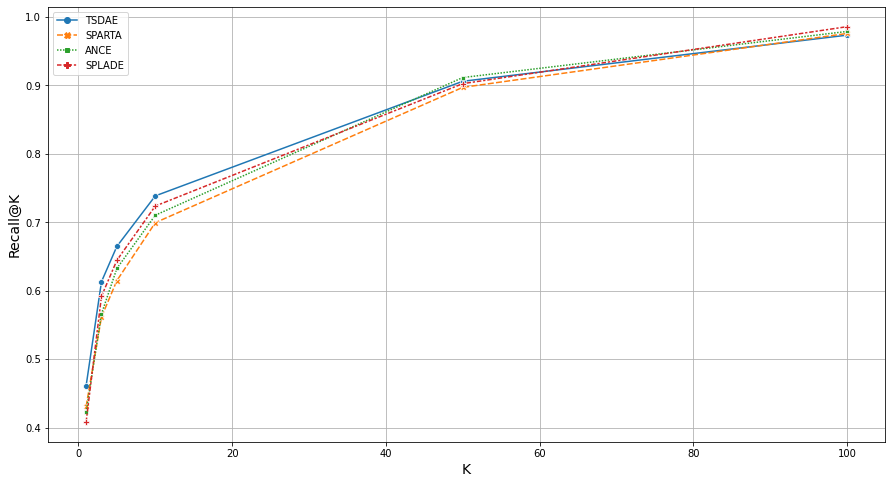

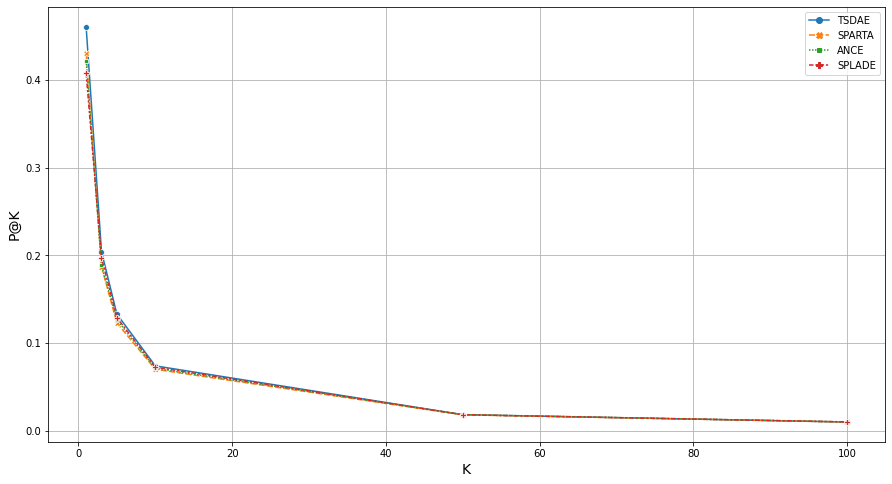

In [ ]:
metrics = ['NDCG', 'MAP', 'Recall', 'P']
for ind, metr in enumerate(metrics):
  draw(res_tsdae =total['TSDAE'][ind], res_sparta =total['SPARTA'][ind],
       res_ance =total['ANCE'][ind], res_splade=total['SPLADE'][ind], metric = metr, k_values = k_values)

In [ ]:
for ind, metric in enumerate(metrics):
  display(res_table_metric(res_tsdae =total['TSDAE'][ind], res_sparta =total['SPARTA'][ind],
        res_ance =total['ANCE'][ind], res_splade=total['SPLADE'][ind], metric = metric, k_values = k_values))

,TSDAE,SPARTA,ANCE,SPLADE
NDCG,,,,
NDCG@1,0.46112,0.43091,0.42249,0.40812
NDCG@3,0.55109,0.50796,0.50617,0.51770
NDCG@5,0.57236,0.52968,0.53315,0.53956
NDCG@10,0.59629,0.55699,0.55832,0.56513
NDCG@50,0.63356,0.60098,0.60263,0.60468
NDCG@100,0.64453,0.61371,0.61361,0.61820


,TSDAE,SPARTA,ANCE,SPLADE
MAP,,,,
MAP@1,0.46112,0.43091,0.42249,0.40812
MAP@3,0.52955,0.48935,0.48547,0.49191
MAP@5,0.54139,0.50134,0.50023,0.50417
MAP@10,0.55131,0.51256,0.51064,0.51469
MAP@50,0.55942,0.52212,0.52010,0.52321
MAP@100,0.56040,0.52323,0.52108,0.52440


,TSDAE,SPARTA,ANCE,SPLADE
Recall,,,,
Recall@1,0.46112,0.43091,0.42249,0.40812
Recall@3,0.61317,0.56166,0.56612,0.59188
Recall@5,0.66469,0.61466,0.63249,0.64438
Recall@10,0.73848,0.69936,0.71025,0.72363
Recall@50,0.90589,0.89698,0.91134,0.90243
Recall@100,0.97325,0.97573,0.97870,0.98564


,TSDAE,SPARTA,ANCE,SPLADE
P,,,,
P@1,0.46112,0.43091,0.42249,0.40812
P@3,0.20439,0.18722,0.18871,0.19729
P@5,0.13294,0.12293,0.12650,0.12888
P@10,0.07385,0.06994,0.07103,0.07236
P@50,0.01812,0.01794,0.01823,0.01805
P@100,0.00973,0.00976,0.00979,0.00986


# Изучение предтренированных моделей

## TSDAE

In [ ]:
tsdae_model = DRES(TSDAE(), batch_size=32)

2022-05-02 07:24:34 - Load pretrained SentenceTransformer: paraphrase-distilroberta-base-v1


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

2022-05-02 07:24:56 - Use pytorch device: cuda


## SPARTA

In [ ]:
class SPARTA:
    def __init__(self, model_path: str = None, sep: str = " ", sparse_vector_dim: int = 2000, max_length: int = 500, **kwargs):
        self.sep = sep
        self.max_length = max_length
        self.sparse_vector_dim = sparse_vector_dim
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModel.from_pretrained(model_path)
        self.initialization()
        self.bert_input_embeddings = self._bert_input_embeddings()
    
    def initialization(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.model.to(self.device)
        self.model.eval()
    
    def _bert_input_embeddings(self):
        bert_input_embs = self.model.embeddings.word_embeddings(
            torch.tensor(list(range(0, len(self.tokenizer))), device=self.device))
        
        # Set Special tokens [CLS] [MASK] etc. to zero
        for special_id in self.tokenizer.all_special_ids:
            bert_input_embs[special_id] = 0 * bert_input_embs[special_id]
        
        return bert_input_embs
    
    def _compute_sparse_embeddings(self, documents):
        sparse_embeddings = []
        with torch.no_grad():
            tokens = self.tokenizer(documents, padding=True, truncation=True, return_tensors='pt', max_length=self.max_length).to(self.device)
            document_embs = self.model(**tokens).last_hidden_state
            for document_emb in document_embs:
                scores = torch.matmul(self.bert_input_embeddings, document_emb.transpose(0, 1))
                max_scores = torch.max(scores, dim=-1).values
                scores = torch.log(torch.relu(max_scores) + 1)
                top_results = torch.topk(scores, k=self.sparse_vector_dim)
                tids = top_results[1].cpu().detach().tolist()
                scores = top_results[0].cpu().detach().tolist()
                passage_emb = []
                
                for tid, score in zip(tids, scores):
                    if score > 0:
                        passage_emb.append((tid, score))
                    else:
                        break
                sparse_embeddings.append(passage_emb)

        return sparse_embeddings
    
    def encode_query(self, query: str, **kwargs):
        return self.tokenizer(query, add_special_tokens=False)['input_ids']
    
    def encode_corpus(self, corpus: List[Dict[str, str]], batch_size: int = 16, **kwargs):
        
        sentences = [(doc["title"] + self.sep + doc["text"]).strip() for doc in corpus]
        sparse_idx = 0
        num_elements = len(sentences) * self.sparse_vector_dim
        col = np.zeros(num_elements, dtype=np.int)
        row = np.zeros(num_elements, dtype=np.int)
        values = np.zeros(num_elements, dtype=np.float)
        
        for start_idx in trange(0, len(sentences), batch_size, desc="docs"):
            doc_embs = self._compute_sparse_embeddings(sentences[start_idx: start_idx + batch_size])
            for doc_id, emb in enumerate(doc_embs):
                for tid, score in emb:
                    col[sparse_idx] = start_idx+doc_id
                    row[sparse_idx] = tid
                    values[sparse_idx] = score
                    sparse_idx += 1
                    
        return csr_matrix((values, (row, col)), shape=(len(self.bert_input_embeddings), len(sentences)), dtype=np.float)

In [ ]:
model_path = "BeIR/sparta-msmarco-distilbert-base-v1"
sparta_model = SparseSearch(models.SPARTA(model_path), batch_size=32)

## ANCE

In [ ]:
ance_model = DRES(models.SentenceBERT("msmarco-roberta-base-ance-firstp"))

2022-04-30 08:16:12 - Load pretrained SentenceTransformer: msmarco-roberta-base-ance-firstp
2022-04-30 08:16:18 - Use pytorch device: cuda


## SPLADE

In [ ]:
class SPLADE:
  def __init__(self, model_path: str = None, sep: str = " ", max_length: int = 256, **kwargs):
      self.max_length = max_length
      self.tokenizer = AutoTokenizer.from_pretrained(model_path)
      self.model = SpladeNaver(model_path)
      self.model.eval()

  def encode_queries(self, queries: List[str], batch_size: int, **kwargs) -> np.ndarray:
      return self.model.encode_sentence_bert(self.tokenizer, queries, is_q=True, maxlen=self.max_length)

  def encode_corpus(self, corpus: List[Dict[str, str]], batch_size: int, **kwargs) -> np.ndarray:
      sentences = [(doc["title"] + ' ' + doc["text"]).strip() for doc in corpus]
      return self.model.encode_sentence_bert(self.tokenizer, sentences, maxlen=self.max_length)

class SpladeNaver(torch.nn.Module):
  def __init__(self, model_path):
      super().__init__()
      self.transformer = AutoModelForMaskedLM.from_pretrained(model_path)

  def forward(self, **kwargs):
      out = self.transformer(**kwargs)["logits"]  # output (logits) of MLM head, shape (bs, pad_len, voc_size)
      return torch.max(torch.log(1 + torch.relu(out)) * kwargs["attention_mask"].unsqueeze(-1), dim=1).values

  def _text_length(self, text: Union[List[int], List[List[int]]]):
      """helper function to get the length for the input text. Text can be either
      a list of ints (which means a single text as input), or a tuple of list of ints
      (representing several text inputs to the model).
      """

      if isinstance(text, dict):  # {key: value} case
          return len(next(iter(text.values())))
      elif not hasattr(text, '__len__'):  # Object has no len() method
          return 1
      elif len(text) == 0 or isinstance(text[0], int):  # Empty string or list of ints
          return len(text)
      else:
          return sum([len(t) for t in text])  # Sum of length of individual strings

  def encode_sentence_bert(self, tokenizer, sentences: Union[str, List[str], List[int]],
                            batch_size: int = 32,
                            show_progress_bar: bool = None,
                            output_value: str = 'sentence_embedding',
                            convert_to_numpy: bool = True,
                            convert_to_tensor: bool = False,
                            device: str = None,
                            normalize_embeddings: bool = False,
                            maxlen: int = 512,
                            is_q: bool = False) -> Union[List[Tensor], ndarray, Tensor]:
      self.eval()
      if show_progress_bar is None:
          show_progress_bar = True

      if convert_to_tensor:
          convert_to_numpy = False

      if output_value == 'token_embeddings':
          convert_to_tensor = False
          convert_to_numpy = False

      input_was_string = False
      if isinstance(sentences, str) or not hasattr(sentences, '__len__'):
          sentences = [sentences]
          input_was_string = True

      if device is None:
          device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

      self.to(device)

      all_embeddings = []
      length_sorted_idx = np.argsort([-self._text_length(sen) for sen in sentences])
      sentences_sorted = [sentences[idx] for idx in length_sorted_idx]

      for start_index in trange(0, len(sentences), batch_size, desc="Batches", disable=not show_progress_bar):
          sentences_batch = sentences_sorted[start_index:start_index + batch_size]
          # features = tokenizer(sentences_batch)
          # print(sentences_batch)
          features = tokenizer(sentences_batch,
                                add_special_tokens=True,
                                padding="longest", 
                                truncation="only_first",
                                max_length=maxlen,
                                return_attention_mask=True,
                                return_tensors="pt")
          # print(features)
          features = batch_to_device(features, device)

          with torch.no_grad():
              out_features = self.forward(**features)
              if output_value == 'token_embeddings':
                  embeddings = []
                  for token_emb, attention in zip(out_features[output_value], out_features['attention_mask']):
                      last_mask_id = len(attention) - 1
                      while last_mask_id > 0 and attention[last_mask_id].item() == 0:
                          last_mask_id -= 1
                      embeddings.append(token_emb[0:last_mask_id + 1])
              else:  # Sentence embeddings
                  # embeddings = out_features[output_value]
                  embeddings = out_features
                  embeddings = embeddings.detach()
                  if normalize_embeddings:
                      embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
                  # fixes for #522 and #487 to avoid oom problems on gpu with large datasets
                  if convert_to_numpy:
                      embeddings = embeddings.cpu()
              all_embeddings.extend(embeddings)
      all_embeddings = [all_embeddings[idx] for idx in np.argsort(length_sorted_idx)]
      if convert_to_tensor:
          all_embeddings = torch.stack(all_embeddings)
      elif convert_to_numpy:
          all_embeddings = np.asarray([emb.numpy() for emb in all_embeddings])
      if input_was_string:
          all_embeddings = all_embeddings[0]
      return all_embeddings

In [ ]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git clone https://github.com/naver/splade

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... ^C
Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (3.1.4).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Git LFS initialized.
fatal: destination path 'splade' already exists and is not an empty directory.


In [ ]:
model_path = "/content/splade/weights/distilsplade_max"
splade_model = DRES(SPLADE(model_path), batch_size=128)

## Первоначальные результаты претренированых моделей ГРАФИКИ

In [ ]:
total = {}
k_values = [1,3,5,10,100,500]
models=['TSDAE', 'SPARTA','ANCE', 'SPLADE']
for ind, m in enumerate([tsdae_model, sparta_model, ance_model, splade_model]):
  total[models[ind]] = evaluate(m, corpus, queries, qrels, k_values)


2022-04-28 18:33:35 - Encoding Queries...


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2022-04-28 18:33:36 - Sorting Corpus by document length (Longest first)...
2022-04-28 18:33:36 - Encoding Corpus in batches... Warning: This might take a while!
2022-04-28 18:33:36 - Scoring Function: Dot Product (dot)
2022-04-28 18:33:36 - Encoding Batch 1/1...


Batches:   0%|          | 0/180 [00:00<?, ?it/s]

2022-04-28 18:36:04 - Retriever evaluation for k in: [1, 3, 5, 10, 100, 500]
2022-04-28 18:36:05 - 

2022-04-28 18:36:05 - NDCG@1: 0.2375
2022-04-28 18:36:05 - NDCG@3: 0.2645
2022-04-28 18:36:05 - NDCG@5: 0.2792
2022-04-28 18:36:05 - NDCG@10: 0.3004
2022-04-28 18:36:05 - NDCG@100: 0.3533
2022-04-28 18:36:05 - NDCG@500: 0.3767
2022-04-28 18:36:05 - 

2022-04-28 18:36:05 - MAP@1: 0.1870
2022-04-28 18:36:05 - MAP@3: 0.2325
2022-04-28 18:36:05 - MAP@5: 0.2438
2022-04-28 18:36:05 - MAP@10: 0.2538
2022-04-28 18:36:05 - MAP@100: 0.2654
2022-04-28 18:36:05 - MAP@500: 0.2666
2022-04-28 18:36:05 - 

2022-04-28 18:36:05 - Recall@1: 0.1870
2022-04-28 18:36:05 - Recall@3: 0.2797
2022-04-28 18:36:05 - Recall@5: 0.3247
2022-04-28 18:36:05 - Recall@10: 0.3889
2022-04-28 18:36:05 - Recall@100: 0.6263
2022-04-28 18:36:05 - Recall@500: 0.7781
2022-04-28 18:36:05 - 

2022-04-28 18:36:05 - P@1: 0.2375
2022-04-28 18:36:05 - P@3: 0.1268
2022-04-28 18:36:05 - P@5: 0.0893
2022-04-28 18:36:05 - P@10: 0.0564
202

docs:   0%|          | 0/180 [00:00<?, ?it/s]

2022-04-28 18:54:57 - Starting to Retrieve...


query:   0%|          | 0/699 [00:00<?, ?it/s]

2022-04-28 18:54:58 - Retriever evaluation for k in: [1, 3, 5, 10, 100, 500]
2022-04-28 18:54:59 - 

2022-04-28 18:54:59 - NDCG@1: 0.2561
2022-04-28 18:54:59 - NDCG@3: 0.2897
2022-04-28 18:54:59 - NDCG@5: 0.3048
2022-04-28 18:54:59 - NDCG@10: 0.3226
2022-04-28 18:54:59 - NDCG@100: 0.3708
2022-04-28 18:54:59 - NDCG@500: 0.3937
2022-04-28 18:54:59 - 

2022-04-28 18:54:59 - MAP@1: 0.2111
2022-04-28 18:54:59 - MAP@3: 0.2599
2022-04-28 18:54:59 - MAP@5: 0.2714
2022-04-28 18:54:59 - MAP@10: 0.2805
2022-04-28 18:54:59 - MAP@100: 0.2909
2022-04-28 18:54:59 - MAP@500: 0.2920
2022-04-28 18:54:59 - 

2022-04-28 18:54:59 - Recall@1: 0.2111
2022-04-28 18:54:59 - Recall@3: 0.3054
2022-04-28 18:54:59 - Recall@5: 0.3484
2022-04-28 18:54:59 - Recall@10: 0.4055
2022-04-28 18:54:59 - Recall@100: 0.6167
2022-04-28 18:54:59 - Recall@500: 0.7652
2022-04-28 18:54:59 - 

2022-04-28 18:54:59 - P@1: 0.2561
2022-04-28 18:54:59 - P@3: 0.1354
2022-04-28 18:54:59 - P@5: 0.0956
2022-04-28 18:54:59 - P@10: 0.0581
202

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2022-04-28 18:55:01 - Sorting Corpus by document length (Longest first)...
2022-04-28 18:55:01 - Encoding Corpus in batches... Warning: This might take a while!
2022-04-28 18:55:01 - Scoring Function: Dot Product (dot)
2022-04-28 18:55:01 - Encoding Batch 1/1...


Batches:   0%|          | 0/180 [00:00<?, ?it/s]

2022-04-28 19:04:27 - Retriever evaluation for k in: [1, 3, 5, 10, 100, 500]
2022-04-28 19:04:27 - 

2022-04-28 19:04:27 - NDCG@1: 0.3162
2022-04-28 19:04:27 - NDCG@3: 0.3448
2022-04-28 19:04:27 - NDCG@5: 0.3628
2022-04-28 19:04:27 - NDCG@10: 0.3872
2022-04-28 19:04:27 - NDCG@100: 0.4370
2022-04-28 19:04:27 - NDCG@500: 0.4559
2022-04-28 19:04:27 - 

2022-04-28 19:04:27 - MAP@1: 0.2589
2022-04-28 19:04:27 - MAP@3: 0.3106
2022-04-28 19:04:27 - MAP@5: 0.3248
2022-04-28 19:04:27 - MAP@10: 0.3375
2022-04-28 19:04:27 - MAP@100: 0.3490
2022-04-28 19:04:27 - MAP@500: 0.3499
2022-04-28 19:04:27 - 

2022-04-28 19:04:27 - Recall@1: 0.2589
2022-04-28 19:04:27 - Recall@3: 0.3587
2022-04-28 19:04:27 - Recall@5: 0.4119
2022-04-28 19:04:27 - Recall@10: 0.4845
2022-04-28 19:04:27 - Recall@100: 0.7006
2022-04-28 19:04:27 - Recall@500: 0.8253
2022-04-28 19:04:27 - 

2022-04-28 19:04:27 - P@1: 0.3162
2022-04-28 19:04:27 - P@3: 0.1612
2022-04-28 19:04:27 - P@5: 0.1142
2022-04-28 19:04:27 - P@10: 0.0708
202

Batches:   0%|          | 0/22 [00:00<?, ?it/s]

2022-04-28 19:04:29 - Sorting Corpus by document length (Longest first)...
2022-04-28 19:04:29 - Encoding Corpus in batches... Warning: This might take a while!
2022-04-28 19:04:29 - Scoring Function: Dot Product (dot)
2022-04-28 19:04:29 - Encoding Batch 1/1...


Batches:   0%|          | 0/719 [00:00<?, ?it/s]

2022-04-28 19:10:37 - Retriever evaluation for k in: [1, 3, 5, 10, 100, 500]
2022-04-28 19:10:37 - 

2022-04-28 19:10:37 - NDCG@1: 0.3433
2022-04-28 19:10:37 - NDCG@3: 0.3812
2022-04-28 19:10:37 - NDCG@5: 0.3974
2022-04-28 19:10:37 - NDCG@10: 0.4193
2022-04-28 19:10:37 - NDCG@100: 0.4661
2022-04-28 19:10:37 - NDCG@500: 0.4886
2022-04-28 19:10:37 - 

2022-04-28 19:10:37 - MAP@1: 0.2808
2022-04-28 19:10:37 - MAP@3: 0.3402
2022-04-28 19:10:37 - MAP@5: 0.3546
2022-04-28 19:10:37 - MAP@10: 0.3674
2022-04-28 19:10:37 - MAP@100: 0.3785
2022-04-28 19:10:37 - MAP@500: 0.3798
2022-04-28 19:10:37 - 

2022-04-28 19:10:37 - Recall@1: 0.2808
2022-04-28 19:10:37 - Recall@3: 0.3977
2022-04-28 19:10:37 - Recall@5: 0.4476
2022-04-28 19:10:37 - Recall@10: 0.5159
2022-04-28 19:10:37 - Recall@100: 0.7199
2022-04-28 19:10:37 - Recall@500: 0.8660
2022-04-28 19:10:37 - 

2022-04-28 19:10:37 - P@1: 0.3433
2022-04-28 19:10:37 - P@3: 0.1817
2022-04-28 19:10:37 - P@5: 0.1279
2022-04-28 19:10:37 - P@10: 0.0778
202

TypeError: ignored

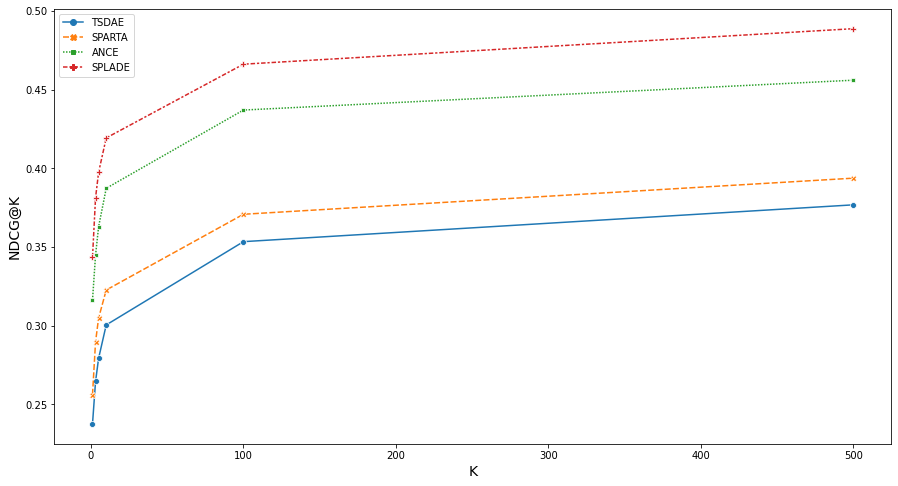

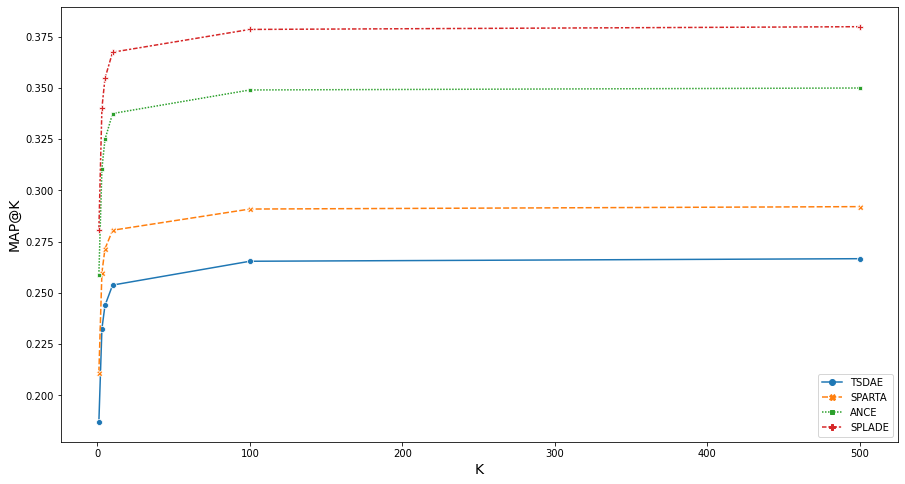

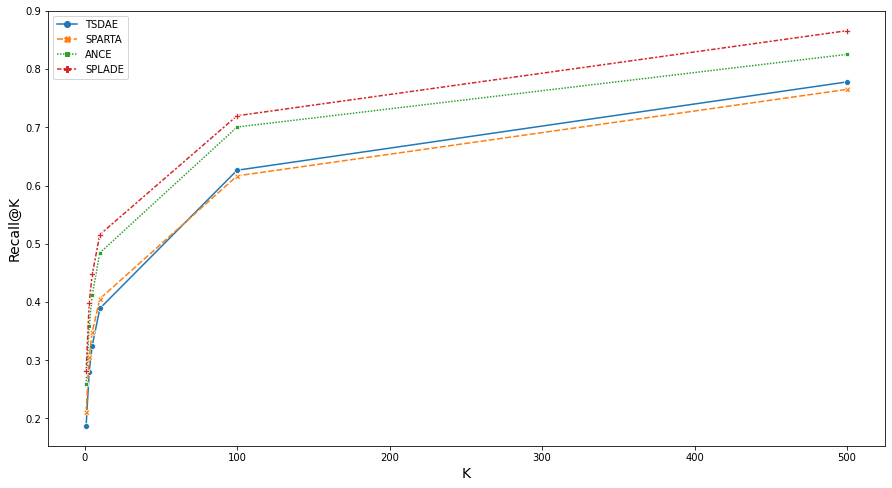

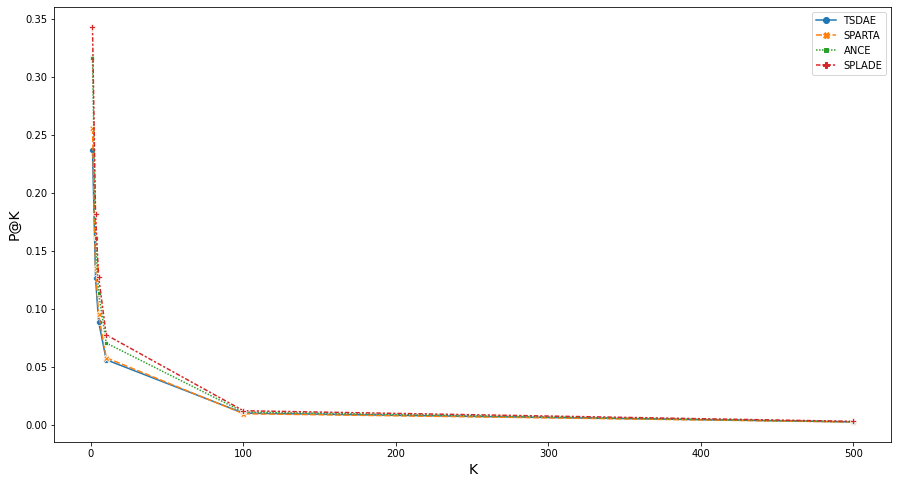

In [ ]:
metrics = ['NDCG', 'MAP', 'Recall', 'P']
for ind, metr in enumerate(metrics):
  draw(res_tsdae =total['TSDAE'][ind], res_sparta =total['SPARTA'][ind],
       res_ance =total['ANCE'][ind], res_splade=total['SPLADE'][ind], metric = metr, k_values = k_values)

In [ ]:
k_values = [1,3,5,10, 50, 100]
models=['TSDAE', 'SPARTA','ANCE', 'SPLADE']
metrics = ['NDCG', 'MAP', 'Recall', 'P']
def draw_cqa(i):
  total = {}
  for ind, m in enumerate([tsdae_model, sparta_model, ance_model, splade_model]):
    total[models[ind]] = evaluate(m, cqa["corpus"][i][0], cqa["queries"][i][0], cqa["qrels"][i][0], k_values)
 
  for ind, metr in enumerate(metrics):
    draw(res_tsdae = total['TSDAE'][ind], res_sparta = total['SPARTA'][ind],
        res_ance = total['ANCE'][ind], res_splade = total['SPLADE'][ind], metric = metr, k_values = k_values)

2022-04-30 08:20:15 - Encoding Queries...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

2022-04-30 08:20:16 - Sorting Corpus by document length (Longest first)...
2022-04-30 08:20:16 - Encoding Corpus in batches... Warning: This might take a while!
2022-04-30 08:20:16 - Scoring Function: Dot Product (dot)
2022-04-30 08:20:16 - Encoding Batch 1/1...


Batches:   0%|          | 0/719 [00:00<?, ?it/s]

2022-04-30 08:22:43 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-04-30 08:22:43 - 

2022-04-30 08:22:43 - NDCG@1: 0.2375
2022-04-30 08:22:43 - NDCG@3: 0.2645
2022-04-30 08:22:43 - NDCG@5: 0.2792
2022-04-30 08:22:43 - NDCG@10: 0.3004
2022-04-30 08:22:43 - NDCG@50: 0.3376
2022-04-30 08:22:43 - NDCG@100: 0.3533
2022-04-30 08:22:43 - 

2022-04-30 08:22:43 - MAP@1: 0.1870
2022-04-30 08:22:43 - MAP@3: 0.2325
2022-04-30 08:22:43 - MAP@5: 0.2438
2022-04-30 08:22:43 - MAP@10: 0.2538
2022-04-30 08:22:43 - MAP@50: 0.2638
2022-04-30 08:22:43 - MAP@100: 0.2654
2022-04-30 08:22:43 - 

2022-04-30 08:22:43 - Recall@1: 0.1870
2022-04-30 08:22:43 - Recall@3: 0.2797
2022-04-30 08:22:43 - Recall@5: 0.3247
2022-04-30 08:22:43 - Recall@10: 0.3889
2022-04-30 08:22:43 - Recall@50: 0.5412
2022-04-30 08:22:43 - Recall@100: 0.6263
2022-04-30 08:22:43 - 

2022-04-30 08:22:43 - P@1: 0.2375
2022-04-30 08:22:43 - P@3: 0.1268
2022-04-30 08:22:43 - P@5: 0.0893
2022-04-30 08:22:43 - P@10: 0.0564
2022-04

docs:   0%|          | 0/719 [00:00<?, ?it/s]

2022-04-30 08:39:12 - Starting to Retrieve...


query:   0%|          | 0/699 [00:00<?, ?it/s]

2022-04-30 08:39:13 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-04-30 08:39:13 - 

2022-04-30 08:39:13 - NDCG@1: 0.2561
2022-04-30 08:39:13 - NDCG@3: 0.2897
2022-04-30 08:39:13 - NDCG@5: 0.3048
2022-04-30 08:39:13 - NDCG@10: 0.3228
2022-04-30 08:39:13 - NDCG@50: 0.3602
2022-04-30 08:39:13 - NDCG@100: 0.3705
2022-04-30 08:39:13 - 

2022-04-30 08:39:13 - MAP@1: 0.2111
2022-04-30 08:39:13 - MAP@3: 0.2599
2022-04-30 08:39:13 - MAP@5: 0.2714
2022-04-30 08:39:13 - MAP@10: 0.2806
2022-04-30 08:39:13 - MAP@50: 0.2897
2022-04-30 08:39:13 - MAP@100: 0.2908
2022-04-30 08:39:13 - 

2022-04-30 08:39:13 - Recall@1: 0.2111
2022-04-30 08:39:13 - Recall@3: 0.3054
2022-04-30 08:39:13 - Recall@5: 0.3484
2022-04-30 08:39:13 - Recall@10: 0.4058
2022-04-30 08:39:13 - Recall@50: 0.5607
2022-04-30 08:39:13 - Recall@100: 0.6160
2022-04-30 08:39:13 - 

2022-04-30 08:39:13 - P@1: 0.2561
2022-04-30 08:39:13 - P@3: 0.1354
2022-04-30 08:39:13 - P@5: 0.0956
2022-04-30 08:39:13 - P@10: 0.0582
2022-04

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2022-04-30 08:39:15 - Sorting Corpus by document length (Longest first)...
2022-04-30 08:39:15 - Encoding Corpus in batches... Warning: This might take a while!
2022-04-30 08:39:15 - Scoring Function: Dot Product (dot)
2022-04-30 08:39:15 - Encoding Batch 1/1...


Batches:   0%|          | 0/180 [00:00<?, ?it/s]

2022-04-30 08:48:38 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-04-30 08:48:38 - 

2022-04-30 08:48:38 - NDCG@1: 0.3162
2022-04-30 08:48:38 - NDCG@3: 0.3448
2022-04-30 08:48:38 - NDCG@5: 0.3628
2022-04-30 08:48:38 - NDCG@10: 0.3872
2022-04-30 08:48:38 - NDCG@50: 0.4244
2022-04-30 08:48:38 - NDCG@100: 0.4370
2022-04-30 08:48:38 - 

2022-04-30 08:48:38 - MAP@1: 0.2589
2022-04-30 08:48:38 - MAP@3: 0.3106
2022-04-30 08:48:38 - MAP@5: 0.3248
2022-04-30 08:48:38 - MAP@10: 0.3375
2022-04-30 08:48:38 - MAP@50: 0.3475
2022-04-30 08:48:38 - MAP@100: 0.3490
2022-04-30 08:48:38 - 

2022-04-30 08:48:38 - Recall@1: 0.2589
2022-04-30 08:48:38 - Recall@3: 0.3587
2022-04-30 08:48:38 - Recall@5: 0.4119
2022-04-30 08:48:38 - Recall@10: 0.4845
2022-04-30 08:48:38 - Recall@50: 0.6345
2022-04-30 08:48:38 - Recall@100: 0.7006
2022-04-30 08:48:38 - 

2022-04-30 08:48:38 - P@1: 0.3162
2022-04-30 08:48:38 - P@3: 0.1612
2022-04-30 08:48:38 - P@5: 0.1142
2022-04-30 08:48:38 - P@10: 0.0708
2022-04

Batches:   0%|          | 0/22 [00:00<?, ?it/s]

2022-04-30 08:48:40 - Sorting Corpus by document length (Longest first)...
2022-04-30 08:48:40 - Encoding Corpus in batches... Warning: This might take a while!
2022-04-30 08:48:40 - Scoring Function: Dot Product (dot)
2022-04-30 08:48:40 - Encoding Batch 1/1...


Batches:   0%|          | 0/719 [00:00<?, ?it/s]

2022-04-30 08:54:46 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-04-30 08:54:46 - 

2022-04-30 08:54:46 - NDCG@1: 0.3433
2022-04-30 08:54:46 - NDCG@3: 0.3812
2022-04-30 08:54:46 - NDCG@5: 0.3974
2022-04-30 08:54:46 - NDCG@10: 0.4193
2022-04-30 08:54:46 - NDCG@50: 0.4540
2022-04-30 08:54:46 - NDCG@100: 0.4661
2022-04-30 08:54:46 - 

2022-04-30 08:54:46 - MAP@1: 0.2808
2022-04-30 08:54:46 - MAP@3: 0.3402
2022-04-30 08:54:46 - MAP@5: 0.3546
2022-04-30 08:54:46 - MAP@10: 0.3674
2022-04-30 08:54:46 - MAP@50: 0.3771
2022-04-30 08:54:46 - MAP@100: 0.3785
2022-04-30 08:54:46 - 

2022-04-30 08:54:46 - Recall@1: 0.2808
2022-04-30 08:54:46 - Recall@3: 0.3977
2022-04-30 08:54:46 - Recall@5: 0.4476
2022-04-30 08:54:46 - Recall@10: 0.5159
2022-04-30 08:54:46 - Recall@50: 0.6571
2022-04-30 08:54:46 - Recall@100: 0.7199
2022-04-30 08:54:46 - 

2022-04-30 08:54:46 - P@1: 0.3433
2022-04-30 08:54:46 - P@3: 0.1817
2022-04-30 08:54:46 - P@5: 0.1279
2022-04-30 08:54:46 - P@10: 0.0778
2022-04

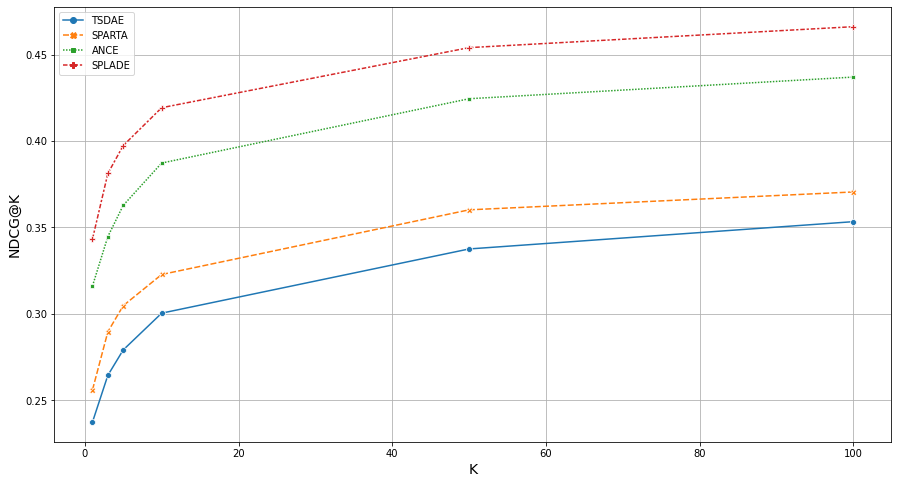

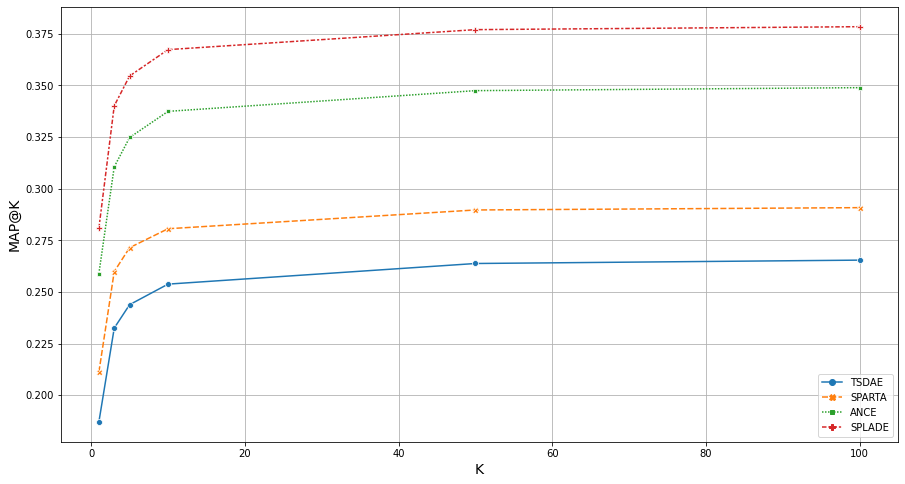

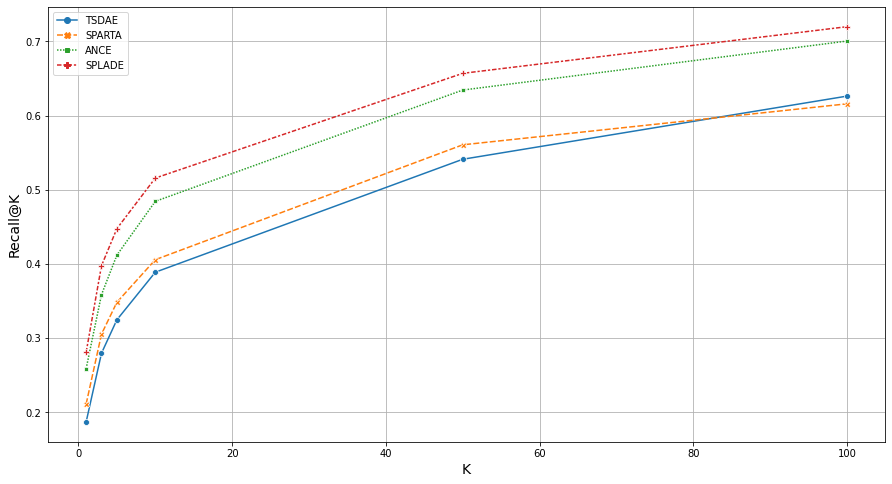

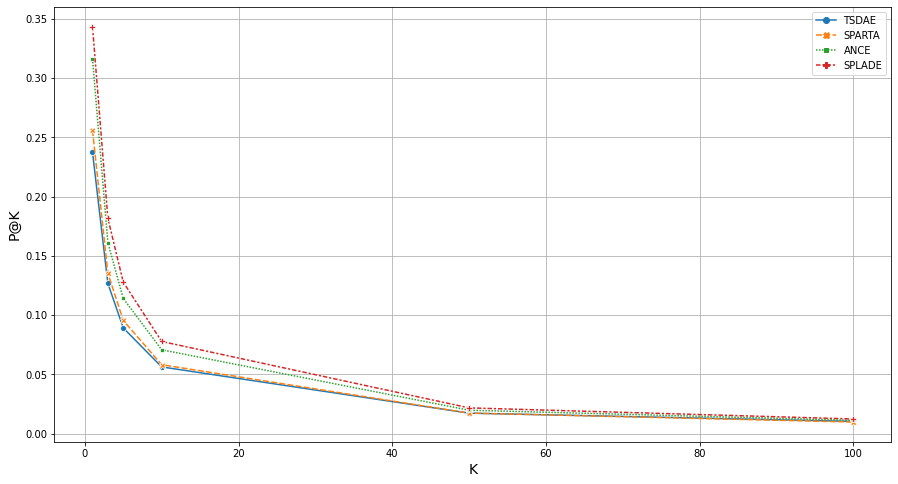

In [ ]:
draw_cqa(0) # "android"

In [ ]:
draw_cqa(1) # "english"

2022-04-30 09:02:29 - Encoding Queries...


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

2022-04-30 09:02:31 - Sorting Corpus by document length (Longest first)...
2022-04-30 09:02:32 - Encoding Corpus in batches... Warning: This might take a while!
2022-04-30 09:02:32 - Scoring Function: Dot Product (dot)
2022-04-30 09:02:32 - Encoding Batch 1/1...


Batches:   0%|          | 0/1257 [00:00<?, ?it/s]

2022-04-30 09:06:33 - Retriever evaluation for k in: [1, 3, 5, 10, 50, 100]
2022-04-30 09:06:33 - 

2022-04-30 09:06:33 - NDCG@1: 0.1860
2022-04-30 09:06:33 - NDCG@3: 0.2134
2022-04-30 09:06:33 - NDCG@5: 0.2239
2022-04-30 09:06:33 - NDCG@10: 0.2418
2022-04-30 09:06:33 - NDCG@50: 0.2693
2022-04-30 09:06:33 - NDCG@100: 0.2774
2022-04-30 09:06:33 - 

2022-04-30 09:06:33 - MAP@1: 0.1497
2022-04-30 09:06:33 - MAP@3: 0.1887
2022-04-30 09:06:33 - MAP@5: 0.1967
2022-04-30 09:06:33 - MAP@10: 0.2052
2022-04-30 09:06:33 - MAP@50: 0.2119
2022-04-30 09:06:33 - MAP@100: 0.2128
2022-04-30 09:06:33 - 

2022-04-30 09:06:33 - Recall@1: 0.1497
2022-04-30 09:06:33 - Recall@3: 0.2291
2022-04-30 09:06:33 - Recall@5: 0.2583
2022-04-30 09:06:33 - Recall@10: 0.3128
2022-04-30 09:06:33 - Recall@50: 0.4273
2022-04-30 09:06:33 - Recall@100: 0.4695
2022-04-30 09:06:33 - 

2022-04-30 09:06:33 - P@1: 0.1860
2022-04-30 09:06:33 - P@3: 0.1023
2022-04-30 09:06:33 - P@5: 0.0720
2022-04-30 09:06:33 - P@10: 0.0455
2022-04

docs:   0%|          | 0/1257 [00:00<?, ?it/s]

In [ ]:
draw_cqa(2) # "gaming"

In [ ]:
draw_cqa(3) # "gis"

In [ ]:
draw_cqa(4) # "mathematica"

In [ ]:
draw_cqa(5) # "physics"

In [ ]:
draw_cqa(6) # "programmers"

In [ ]:
draw_cqa(7) # "stats"

In [ ]:
draw_cqa(8) # "tex"

In [ ]:
draw_cqa(9) # "unix"

In [ ]:
draw_cqa(10) # "webmasters"

In [ ]:
draw_cqa(11) # "wordpress"